# Problem Statement:-

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
from scipy import stats
from scipy.stats import norm
from scipy.stats import boxcox
import statsmodels.api as sm
from scipy.stats import ttest_ind # T-test for independent samples
from scipy.stats import shapiro # Shapiro-Wilk’s test for Normality
from scipy.stats import levene # Levene's test for Equality of Variance
from scipy.stats import f_oneway # One-way ANOVA
from scipy.stats import chi2_contingency # Chi-square test of independence
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("sample.csv",index_col=0)
df.head()

,po_nbr,present_inv,lead_time,total_whpk_qty,fcst_3_mo,fcst_6_mo,fcst_9_mo,sls_1_mo,sls_3_mo,sls_6_mo,...,spare_parts_overdue,avg_ratings_6_mo,avg_ratings_12_mo,stock_overdue,internal_risk1,internal_risk2,production_quality_risk,pdt_recsys,internal_risk3,out_of_stock
1259895,2842257,415.0,NaN,0.0,0.0,0.0,0.0,0.0,3.0,28.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,No,No,No
1453574,3043795,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.05,0.0,Yes,No,No,Yes,No,No
602282,1950252,71.0,8.0,6.0,100.0,140.0,160.0,14.0,35.0,71.0,...,0.0,0.93,0.94,0.0,No,No,No,Yes,No,No
480648,1828636,5.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.96,0.0,No,No,No,Yes,No,No
201010,1312565,63.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,...,0.0,0.69,0.40,0.0,Yes,No,No,Yes,No,No


In [3]:
df.shape

(192994, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192994 entries, 1259895 to 1596827
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   po_nbr                   192994 non-null  int64  
 1   present_inv              192994 non-null  float64
 2   lead_time                181317 non-null  float64
 3   total_whpk_qty           192994 non-null  float64
 4   fcst_3_mo                192994 non-null  float64
 5   fcst_6_mo                192994 non-null  float64
 6   fcst_9_mo                192994 non-null  float64
 7   sls_1_mo                 192994 non-null  float64
 8   sls_3_mo                 192994 non-null  float64
 9   sls_6_mo                 192994 non-null  float64
 10  sls_9_mo                 192994 non-null  float64
 11  minimum_stock_qty        192994 non-null  float64
 12  identified_defect        192994 non-null  object 
 13  spare_parts_overdue      192994 non-null  float64
 1

In [5]:
df.isnull().sum()*100/len(df)

po_nbr                     0.000000
present_inv                0.000000
lead_time                  6.050447
total_whpk_qty             0.000000
fcst_3_mo                  0.000000
fcst_6_mo                  0.000000
fcst_9_mo                  0.000000
sls_1_mo                   0.000000
sls_3_mo                   0.000000
sls_6_mo                   0.000000
sls_9_mo                   0.000000
minimum_stock_qty          0.000000
identified_defect          0.000000
spare_parts_overdue        0.000000
avg_ratings_6_mo           0.000000
avg_ratings_12_mo          0.000000
stock_overdue              0.000000
internal_risk1             0.000000
internal_risk2             0.000000
production_quality_risk    0.000000
pdt_recsys                 0.000000
internal_risk3             0.000000
out_of_stock               0.000000
dtype: float64

In [6]:
df.duplicated().sum()

0

In [12]:
df.describe()

,po_nbr,present_inv,lead_time,total_whpk_qty,fcst_3_mo,fcst_6_mo,fcst_9_mo,sls_1_mo,sls_3_mo,sls_6_mo,sls_9_mo,minimum_stock_qty,spare_parts_overdue,avg_ratings_6_mo,avg_ratings_12_mo,stock_overdue
count,1.929940e+05,1.929940e+05,181317.000000,192994.000000,1.929940e+05,1.929940e+05,1.929940e+05,192994.000000,1.929940e+05,1.929940e+05,1.929940e+05,192994.000000,192994.000000,192994.000000,192994.000000,192994.000000
mean,2.256478e+06,4.071565e+02,7.857542,49.897406,1.916102e+02,3.689133e+02,5.411289e+02,60.369006,1.896981e+02,3.686664e+02,5.642267e+02,56.626481,2.907225,-6.914761,-6.504727,0.722162
std,7.644566e+05,7.308631e+03,6.995806,1669.073170,5.743923e+03,1.137062e+04,1.694249e+04,2115.744453,6.265479e+03,1.163180e+04,1.800806e+04,1612.953221,411.985042,26.622844,25.952688,38.620386
min,1.045867e+06,-1.349100e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-99.000000,-99.000000,0.000000
25%,1.594203e+06,4.000000e+00,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.630000,0.660000,0.000000
50%,2.072349e+06,1.500000e+01,8.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,2.000000e+00,4.000000e+00,0.000000,0.000000,0.820000,0.810000,0.000000
75%,3.041604e+06,8.000000e+01,9.000000,0.000000,4.000000e+00,1.200000e+01,2.000000e+01,4.000000,1.500000e+01,3.100000e+01,4.700000e+01,3.000000,0.000000,0.960000,0.950000,0.000000
max,3.526980e+06,1.370327e+06,52.000000,328060.000000,1.218328e+06,2.461360e+06,3.777304e+06,366191.000000,1.084974e+06,2.146625e+06,3.197338e+06,311423.000000,137625.000000,1.000000,1.000000,6544.000000


In [13]:
print("Number of rows in dataframe df : ",df.shape[0]," and Number of unique IDs in dataframe df : ",len(df.po_nbr.unique()))

Number of rows in dataframe df :  192994  and Number of unique IDs in dataframe df :  192994


In [14]:
df['out_of_stock'].value_counts()

No     191582
Yes      1412
Name: out_of_stock, dtype: int64

In [15]:
for i in df.columns:
    print(i,':',df[i].nunique())

po_nbr : 192994
present_inv : 5612
lead_time : 32
total_whpk_qty : 1812
fcst_3_mo : 2857
fcst_6_mo : 3954
fcst_9_mo : 4793
sls_1_mo : 2012
sls_3_mo : 3631
sls_6_mo : 5111
sls_9_mo : 6207
minimum_stock_qty : 1984
identified_defect : 2
spare_parts_overdue : 312
avg_ratings_6_mo : 102
avg_ratings_12_mo : 102
stock_overdue : 236
internal_risk1 : 2
internal_risk2 : 2
production_quality_risk : 2
pdt_recsys : 2
internal_risk3 : 2
out_of_stock : 2


In [16]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

3147775    1
3501319    1
2949032    1
2219281    1
3265808    1
          ..
2175731    1
1206614    1
1132151    1
3261165    1
2885633    1
Name: po_nbr, Length: 192994, dtype: int64


0.0       12449
2.0       12248
3.0       10538
4.0        7827
5.0        6811
          ...  
9617.0        1
3081.0        1
5005.0        1
7591.0        1
4152.0        1
Name: present_inv, Length: 5612, dtype: int64


8.0     78313
2.0     38574
12.0    22780
4.0     14757
9.0     13934
52.0     3358
3.0      1728
10.0     1600
14.0     1205
0.0      1198
16.0     1052
13.0      596
6.0       578
17.0      465
15.0      419
5.0       417
11.0      119
20.0       54
30.0       44
18.0       37
22.0       20
7.0        14
24.0       13
26.0       10
21.0        8
28.0        6
40.0        6
1.0         4
23.0        3
19.0        2
35.0        2
25.0        1
Name: lead_time, dtype: int64


0.0        154038
1.0          4117
2.0          2496
3.0          1953
4.0          1736
            ...  


# EDA

In [17]:
df = pd.read_csv("sample.csv",index_col=0)

In [18]:
df.head()

,po_nbr,present_inv,lead_time,total_whpk_qty,fcst_3_mo,fcst_6_mo,fcst_9_mo,sls_1_mo,sls_3_mo,sls_6_mo,...,spare_parts_overdue,avg_ratings_6_mo,avg_ratings_12_mo,stock_overdue,internal_risk1,internal_risk2,production_quality_risk,pdt_recsys,internal_risk3,out_of_stock
1259895,2842257,415.0,NaN,0.0,0.0,0.0,0.0,0.0,3.0,28.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,No,No,No
1453574,3043795,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.05,0.0,Yes,No,No,Yes,No,No
602282,1950252,71.0,8.0,6.0,100.0,140.0,160.0,14.0,35.0,71.0,...,0.0,0.93,0.94,0.0,No,No,No,Yes,No,No
480648,1828636,5.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.96,0.0,No,No,No,Yes,No,No
201010,1312565,63.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,...,0.0,0.69,0.40,0.0,Yes,No,No,Yes,No,No


In [19]:
df = df.reset_index(drop=True)
df.head()

,po_nbr,present_inv,lead_time,total_whpk_qty,fcst_3_mo,fcst_6_mo,fcst_9_mo,sls_1_mo,sls_3_mo,sls_6_mo,...,spare_parts_overdue,avg_ratings_6_mo,avg_ratings_12_mo,stock_overdue,internal_risk1,internal_risk2,production_quality_risk,pdt_recsys,internal_risk3,out_of_stock
0,2842257,415.0,NaN,0.0,0.0,0.0,0.0,0.0,3.0,28.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,No,No,No
1,3043795,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.05,0.0,Yes,No,No,Yes,No,No
2,1950252,71.0,8.0,6.0,100.0,140.0,160.0,14.0,35.0,71.0,...,0.0,0.93,0.94,0.0,No,No,No,Yes,No,No
3,1828636,5.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.96,0.0,No,No,No,Yes,No,No
4,1312565,63.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,...,0.0,0.69,0.40,0.0,Yes,No,No,Yes,No,No


In [22]:
df[['minimum_stock_qty', 'identified_defect',
       'spare_parts_overdue', 'avg_ratings_6_mo', 'avg_ratings_12_mo',
       'stock_overdue', 'internal_risk1', 'internal_risk2',
       'production_quality_risk']]

,minimum_stock_qty,identified_defect,spare_parts_overdue,avg_ratings_6_mo,avg_ratings_12_mo,stock_overdue,internal_risk1,internal_risk2,production_quality_risk
0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No
1,0.0,No,0.0,0.00,0.05,0.0,Yes,No,No
2,22.0,No,0.0,0.93,0.94,0.0,No,No,No
3,0.0,No,0.0,0.99,0.96,0.0,No,No,No
4,1.0,No,0.0,0.69,0.40,0.0,Yes,No,No
...,...,...,...,...,...,...,...,...,...
192989,0.0,No,0.0,0.96,0.97,0.0,No,No,No
192990,0.0,No,0.0,0.91,0.77,0.0,Yes,No,No
192991,0.0,No,0.0,0.90,0.82,0.0,No,No,No
192992,0.0,No,0.0,0.10,0.13,0.0,Yes,No,No


In [23]:
df.columns

Index(['po_nbr', 'present_inv', 'lead_time', 'total_whpk_qty', 'fcst_3_mo',
       'fcst_6_mo', 'fcst_9_mo', 'sls_1_mo', 'sls_3_mo', 'sls_6_mo',
       'sls_9_mo', 'minimum_stock_qty', 'identified_defect',
       'spare_parts_overdue', 'avg_ratings_6_mo', 'avg_ratings_12_mo',
       'stock_overdue', 'internal_risk1', 'internal_risk2',
       'production_quality_risk', 'pdt_recsys', 'internal_risk3',
       'out_of_stock'],
      dtype='object')

# EDA

In [24]:
df.head()

,po_nbr,present_inv,lead_time,total_whpk_qty,fcst_3_mo,fcst_6_mo,fcst_9_mo,sls_1_mo,sls_3_mo,sls_6_mo,...,spare_parts_overdue,avg_ratings_6_mo,avg_ratings_12_mo,stock_overdue,internal_risk1,internal_risk2,production_quality_risk,pdt_recsys,internal_risk3,out_of_stock
0,2842257,415.0,NaN,0.0,0.0,0.0,0.0,0.0,3.0,28.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,No,No,No
1,3043795,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.05,0.0,Yes,No,No,Yes,No,No
2,1950252,71.0,8.0,6.0,100.0,140.0,160.0,14.0,35.0,71.0,...,0.0,0.93,0.94,0.0,No,No,No,Yes,No,No
3,1828636,5.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.96,0.0,No,No,No,Yes,No,No
4,1312565,63.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,...,0.0,0.69,0.40,0.0,Yes,No,No,Yes,No,No


# Univariate Analysis 

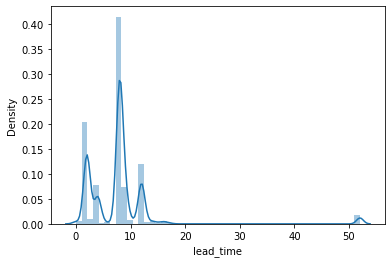

In [25]:
sns.distplot(df['lead_time'])
plt.show()

In [26]:
df.columns

Index(['po_nbr', 'present_inv', 'lead_time', 'total_whpk_qty', 'fcst_3_mo',
       'fcst_6_mo', 'fcst_9_mo', 'sls_1_mo', 'sls_3_mo', 'sls_6_mo',
       'sls_9_mo', 'minimum_stock_qty', 'identified_defect',
       'spare_parts_overdue', 'avg_ratings_6_mo', 'avg_ratings_12_mo',
       'stock_overdue', 'internal_risk1', 'internal_risk2',
       'production_quality_risk', 'pdt_recsys', 'internal_risk3',
       'out_of_stock'],
      dtype='object')

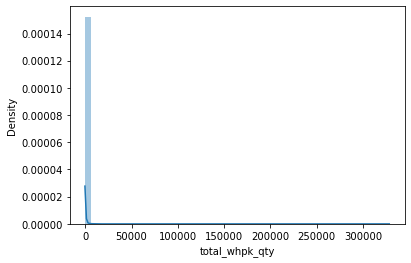

In [27]:
sns.distplot(df['total_whpk_qty']) 
plt.show()

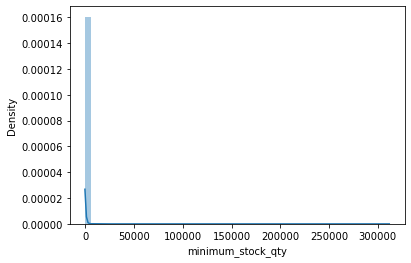

In [28]:
sns.distplot(df['minimum_stock_qty']) 
plt.show()

In [29]:
#Basic Probabilties 

In [30]:
#Marginal, Joint, Conditional Probs

In [31]:
P(out of stock scenario and risk3 = yes) ---joint

SyntaxError: invalid syntax (<ipython-input-31-c0fe6bf4cb98>, line 1)

In [ ]:
P(oos)--marginal
p(oos | lead time > 7)

In [ ]:
pd.crosstab(df["internal_risk3"],df["out_of_stock"],margins=True,)

In [ ]:
pd.crosstab(index = df.internal_risk3, columns = df.out_of_stock, values = df.lead_time, aggfunc = 'mean')

In [ ]:
pd.crosstab(index = df.internal_risk2, columns = df.out_of_stock, values = df.lead_time, aggfunc = 'mean')

In [ ]:
pd.crosstab(index = df.internal_risk1, columns = df.out_of_stock, values = df.lead_time, aggfunc = 'mean')

In [ ]:
crosstab = pd.crosstab(df["internal_risk3"],df["out_of_stock"])
print(crosstab)

In [ ]:
crosstab.T

In [ ]:
crosstab.T.sum()

In [ ]:
crosstab.T.div(crosstab.T.sum()).T

In [ ]:
crosstab = pd.crosstab(df["internal_risk3"],df["out_of_stock"])
print(crosstab)
probs = crosstab.T.div(crosstab.T.sum()).T

print('*'*50)
print(probs)

fig,ax = plt.subplots()
probs.plot(kind='bar',ax=ax,figsize =(10,7))
plt.show()

In [ ]:
df.columns

In [ ]:
ct = pd.crosstab(df['out_of_stock'],df['internal_risk1'],normalize=True)

In [ ]:
oos_m = ct.sum(axis =1) #Marginal Probs
oos_m

In [ ]:
cop = ct.divide(oos_m,axis =1)
cop

In [32]:
p(a|b) = p(a^b)/p(b)

SyntaxError: cannot assign to function call (<ipython-input-32-c4e7ed3ea9f9>, line 1)

out_of_stock        No   Yes     All
internal_risk1                      
No              148038  1178  149216
Yes              43544   234   43778
All             191582  1412  192994
**************************************************
out_of_stock          No       Yes  All
internal_risk1                         
No              0.496053  0.003947  0.5
Yes             0.497327  0.002673  0.5
All             0.496342  0.003658  0.5


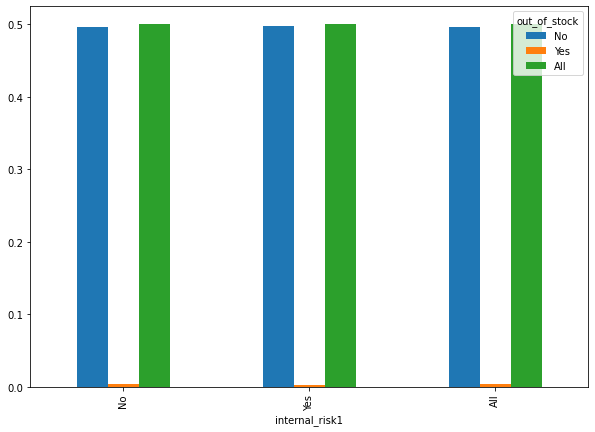

In [33]:
crosstab = pd.crosstab(df["internal_risk1"],df["out_of_stock"],margins=True)

print(crosstab)
probs = crosstab.T.div(crosstab.T.sum()).T

print('*'*50)
print(probs)

fig,ax = plt.subplots()
probs.plot(kind='bar',ax=ax,figsize =(10,7))
plt.show()

out_of_stock        No   Yes     All
internal_risk2                      
No              191546  1410  192956
Yes                 36     2      38
All             191582  1412  192994
**************************************************
out_of_stock          No       Yes  All
internal_risk2                         
No              0.496346  0.003654  0.5
Yes             0.473684  0.026316  0.5
All             0.496342  0.003658  0.5


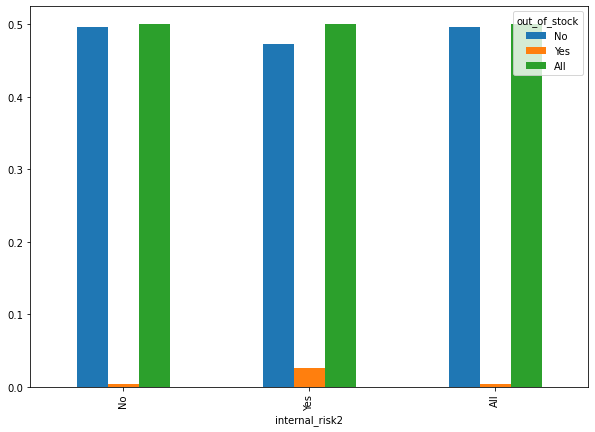

In [34]:
crosstab = pd.crosstab(df["internal_risk2"],df["out_of_stock"],margins=True)

print(crosstab)
probs = crosstab.T.div(crosstab.T.sum()).T

print('*'*50)
print(probs)

fig,ax = plt.subplots()
probs.plot(kind='bar',ax=ax,figsize =(10,7))
plt.show()

In [35]:
df.columns

Index(['po_nbr', 'present_inv', 'lead_time', 'total_whpk_qty', 'fcst_3_mo',
       'fcst_6_mo', 'fcst_9_mo', 'sls_1_mo', 'sls_3_mo', 'sls_6_mo',
       'sls_9_mo', 'minimum_stock_qty', 'identified_defect',
       'spare_parts_overdue', 'avg_ratings_6_mo', 'avg_ratings_12_mo',
       'stock_overdue', 'internal_risk1', 'internal_risk2',
       'production_quality_risk', 'pdt_recsys', 'internal_risk3',
       'out_of_stock'],
      dtype='object')

out_of_stock      No   Yes     All
pdt_recsys                        
No              6978    64    7042
Yes           184604  1348  185952
All           191582  1412  192994
**************************************************
out_of_stock        No       Yes  All
pdt_recsys                           
No            0.495456  0.004544  0.5
Yes           0.496375  0.003625  0.5
All           0.496342  0.003658  0.5


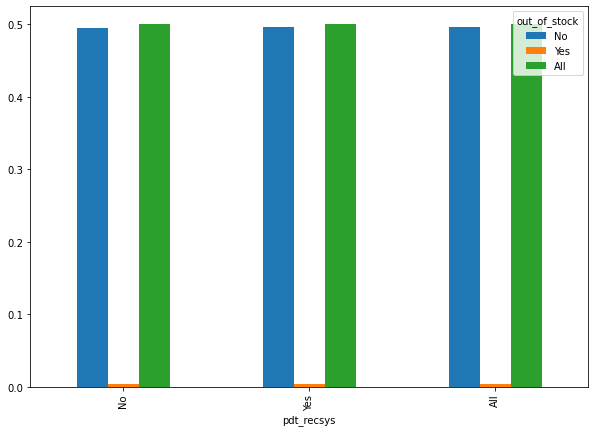

In [37]:
crosstab = pd.crosstab(df["pdt_recsys"],df["out_of_stock"],margins=True)

print(crosstab)
probs = crosstab.T.div(crosstab.T.sum()).T

print('*'*50)
print(probs)

fig,ax = plt.subplots()
probs.plot(kind='bar',ax=ax,figsize =(10,7))
plt.show()

out_of_stock           No   Yes
identified_defect              
No                 191496  1403
Yes                    86     9
**************************************************
out_of_stock             No       Yes
identified_defect                    
No                 0.992727  0.007273
Yes                0.905263  0.094737


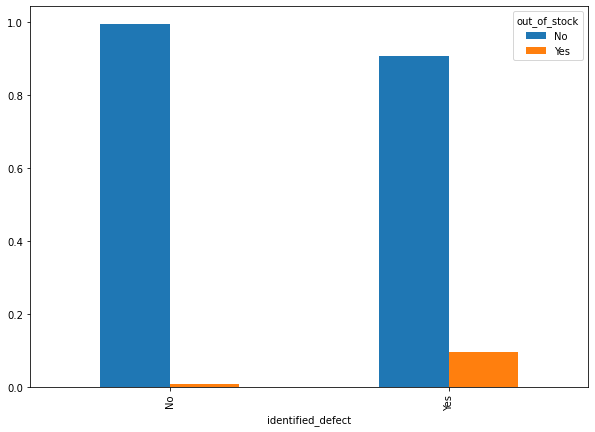

In [38]:
crosstab = pd.crosstab(df["identified_defect"],df["out_of_stock"])

print(crosstab)
probs = crosstab.T.div(crosstab.T.sum()).T

print('*'*50)
print(probs)

fig,ax = plt.subplots()
probs.plot(kind='bar',ax=ax,figsize =(10,7))
plt.show()

In [39]:
#There 

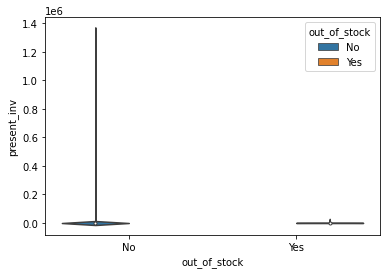

In [40]:
sns.violinplot(x = 'out_of_stock',y = 'present_inv' ,hue = 'out_of_stock', data = df,size=15,notch = True)
plt.show()

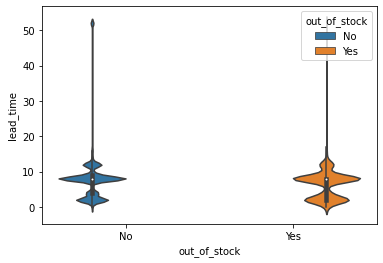

In [41]:
sns.violinplot(x = 'out_of_stock',y = 'lead_time' ,hue = 'out_of_stock', data = df,size=15,notch = True)
plt.show()

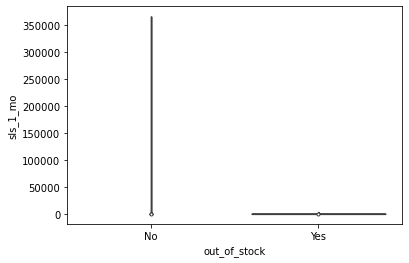

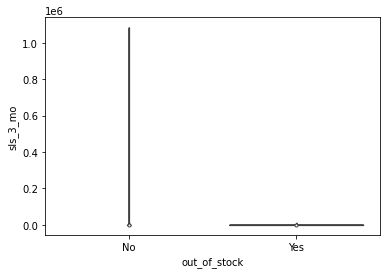

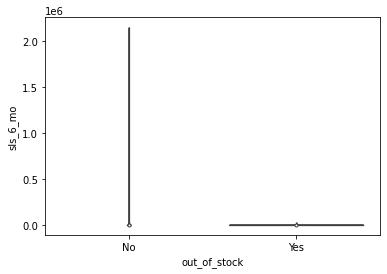

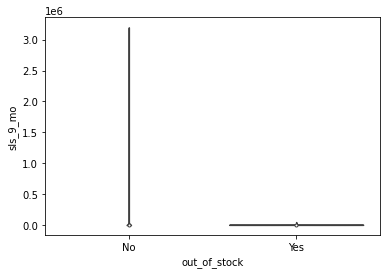

In [42]:
sns.violinplot(x=df['out_of_stock'],y = df['sls_1_mo'])
plt.show()

sns.violinplot(x=df['out_of_stock'],y = df['sls_3_mo'])
plt.show()

sns.violinplot(x=df['out_of_stock'],y = df['sls_6_mo'])
plt.show()

sns.violinplot(x=df['out_of_stock'],y = df['sls_9_mo'])
plt.show()


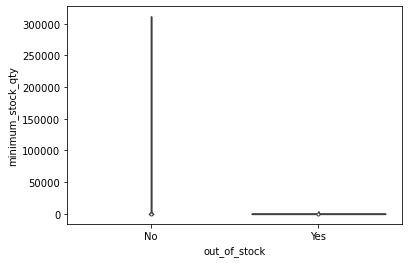

In [43]:
sns.violinplot(x=df['out_of_stock'],y = df['minimum_stock_qty'])
plt.show()

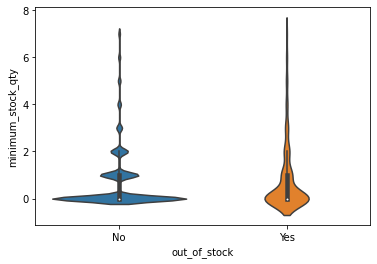

In [44]:
q1_minimum_stock_qty = df.minimum_stock_qty.quantile(0.25) # Storing the 25th percentile value
q3_minimum_stock_qty = df.minimum_stock_qty.quantile(0.75) # Storing the 75 th percentile value

iqr_minimum_stock_qty = q3_minimum_stock_qty - q1_minimum_stock_qty  #Calculating the IQR

# Trying to detect outliers using this method where we define a new range
lower_bound = q1_minimum_stock_qty - 1.5*iqr_minimum_stock_qty
upper_bound = q3_minimum_stock_qty + 1.5*iqr_minimum_stock_qty



range_m= (df.minimum_stock_qty >= lower_bound) & (df.minimum_stock_qty <= upper_bound)
sns.violinplot(x = 'out_of_stock',y = 'minimum_stock_qty',data = df.loc[range_m],showfliers = False)
plt.show()

In [45]:
df.columns

Index(['po_nbr', 'present_inv', 'lead_time', 'total_whpk_qty', 'fcst_3_mo',
       'fcst_6_mo', 'fcst_9_mo', 'sls_1_mo', 'sls_3_mo', 'sls_6_mo',
       'sls_9_mo', 'minimum_stock_qty', 'identified_defect',
       'spare_parts_overdue', 'avg_ratings_6_mo', 'avg_ratings_12_mo',
       'stock_overdue', 'internal_risk1', 'internal_risk2',
       'production_quality_risk', 'pdt_recsys', 'internal_risk3',
       'out_of_stock'],
      dtype='object')

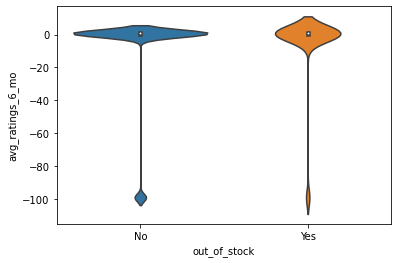

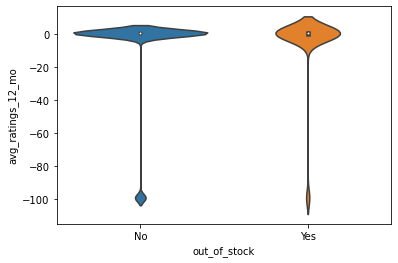

In [46]:
sns.violinplot(x=df['out_of_stock'],y = df['avg_ratings_6_mo'])
plt.show()

sns.violinplot(x=df['out_of_stock'],y = df['avg_ratings_12_mo'])
plt.show()

In [89]:
df['stock_overdue'].value_counts()

0.0       190332
1.0          830
2.0          351
3.0          193
4.0          136
           ...  
165.0          1
114.0          1
47.0           1
5200.0         1
766.0          1
Name: stock_overdue, Length: 236, dtype: int64

In [86]:
# sns.pairplot(df,hue = 'out_of_stock')
# plt.show()

In [80]:
df.columns

Index(['po_nbr', 'present_inv', 'lead_time', 'total_whpk_qty', 'fcst_3_mo',
       'fcst_6_mo', 'fcst_9_mo', 'sls_1_mo', 'sls_3_mo', 'sls_6_mo',
       'sls_9_mo', 'minimum_stock_qty', 'identified_defect',
       'spare_parts_overdue', 'avg_ratings_6_mo', 'avg_ratings_12_mo',
       'stock_overdue', 'internal_risk1', 'internal_risk2',
       'production_quality_risk', 'pdt_recsys', 'internal_risk3',
       'out_of_stock'],
      dtype='object')

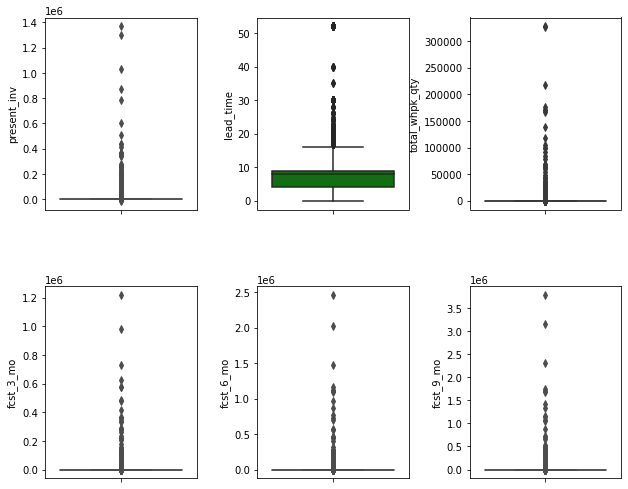

In [81]:
fig=plt.figure(figsize=(10,8))

plt.subplot(2,3,1)
sns.boxplot(data=df,y='present_inv',color='r')
plt.subplot(2,3,2)
sns.boxplot(data=df,y='lead_time',color='green')
plt.subplot(2,3,3)
sns.boxplot(data=df,y='total_whpk_qty',color='y')
plt.subplot(2,3,4)
sns.boxplot(data=df,y='fcst_3_mo',color='orange')
plt.subplot(2,3,5)
sns.boxplot(data=df,y='fcst_6_mo',color='b')
plt.subplot(2,3,6)
sns.boxplot(data=df,y='fcst_9_mo',color='gray')

plt.subplots_adjust(left=0.1,
bottom=0.1,
right=0.9,
top=0.9,
wspace=0.4,
hspace=0.4)
plt.show()

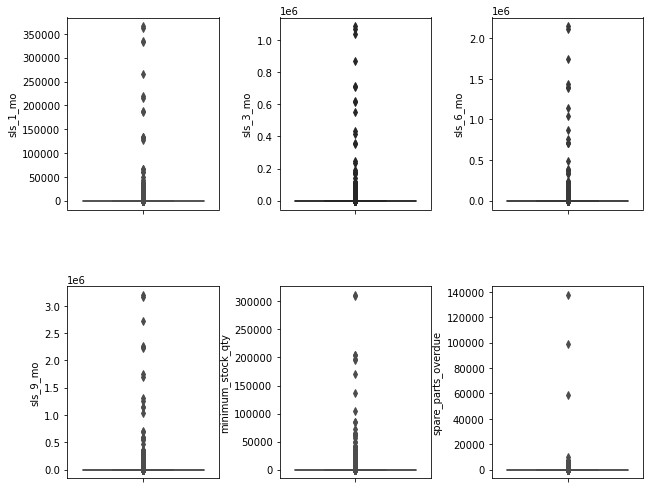

In [84]:
fig=plt.figure(figsize=(10,8))

plt.subplot(2,3,1)
sns.boxplot(data=df,y='sls_1_mo',color='r')
plt.subplot(2,3,2)
sns.boxplot(data=df,y='sls_3_mo',color='green')
plt.subplot(2,3,3)
sns.boxplot(data=df,y='sls_6_mo',color='y')
plt.subplot(2,3,4)
sns.boxplot(data=df,y='sls_9_mo',color='orange')
plt.subplot(2,3,5)
sns.boxplot(data=df,y='minimum_stock_qty',color='b')
plt.subplot(2,3,6)
sns.boxplot(data=df,y='spare_parts_overdue',color='gray')

plt.subplots_adjust(left=0.1,
bottom=0.1,
right=0.9,
top=0.9,
wspace=0.4,
hspace=0.4)
plt.show()

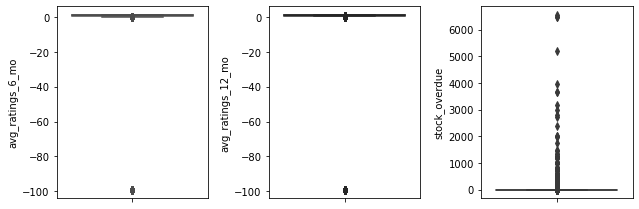

In [90]:
fig=plt.figure(figsize=(10,8))

plt.subplot(2,3,1)
sns.boxplot(data=df,y='avg_ratings_6_mo',color='r')
plt.subplot(2,3,2)
sns.boxplot(data=df,y='avg_ratings_12_mo',color='green')
plt.subplot(2,3,3)
sns.boxplot(data=df,y='stock_overdue',color='y')

plt.subplots_adjust(left=0.1,
bottom=0.1,
right=0.9,
top=0.9,
wspace=0.4,
hspace=0.4)
plt.show()

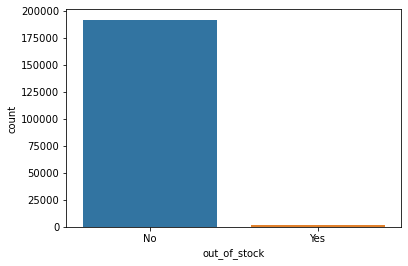

In [91]:
sns.countplot(df['out_of_stock'])
plt.show()

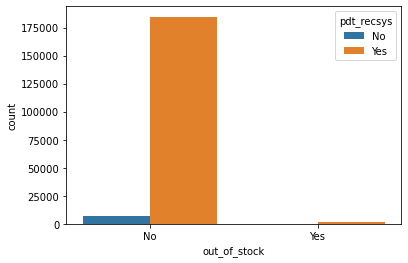

In [93]:
sns.countplot(data=df,x='out_of_stock',hue='pdt_recsys')
plt.show()

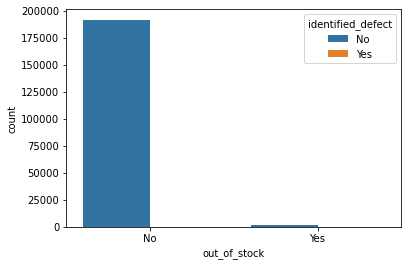

In [95]:
sns.countplot(data=df,x='out_of_stock',hue='identified_defect')
plt.show()

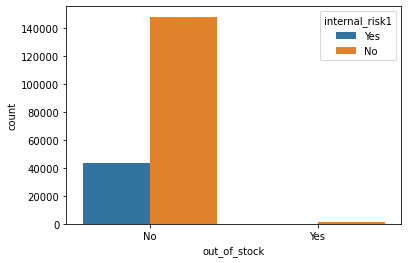

In [96]:
sns.countplot(data=df,x='out_of_stock',hue='internal_risk1')
plt.show()

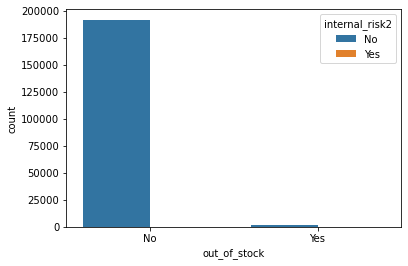

In [97]:
sns.countplot(data=df,x='out_of_stock',hue='internal_risk2')
plt.show()

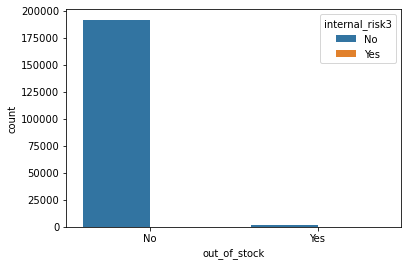

In [98]:
sns.countplot(data=df,x='out_of_stock',hue='internal_risk3')
plt.show()

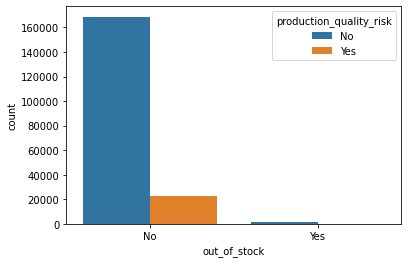

In [99]:
sns.countplot(data=df,x='out_of_stock',hue='production_quality_risk')
plt.show()

In [94]:
df.columns

Index(['po_nbr', 'present_inv', 'lead_time', 'total_whpk_qty', 'fcst_3_mo',
       'fcst_6_mo', 'fcst_9_mo', 'sls_1_mo', 'sls_3_mo', 'sls_6_mo',
       'sls_9_mo', 'minimum_stock_qty', 'identified_defect',
       'spare_parts_overdue', 'avg_ratings_6_mo', 'avg_ratings_12_mo',
       'stock_overdue', 'internal_risk1', 'internal_risk2',
       'production_quality_risk', 'pdt_recsys', 'internal_risk3',
       'out_of_stock'],
      dtype='object')

In [109]:
list(df.select_dtypes(include=['object']).columns[:-1])

['identified_defect',
 'internal_risk1',
 'internal_risk2',
 'production_quality_risk',
 'pdt_recsys',
 'internal_risk3']

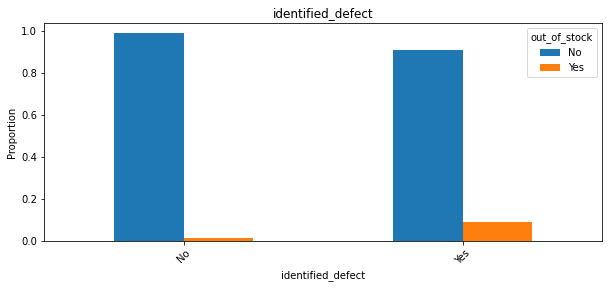

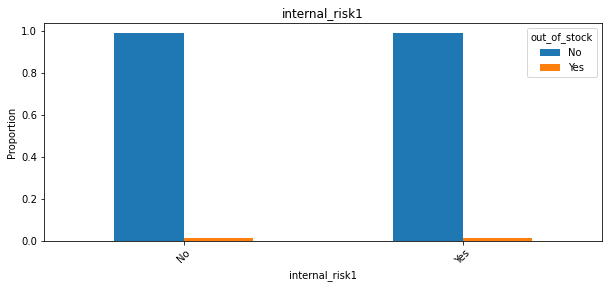

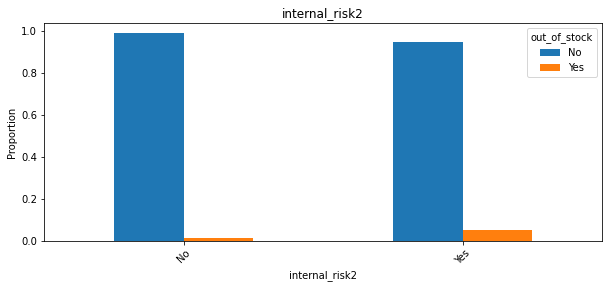

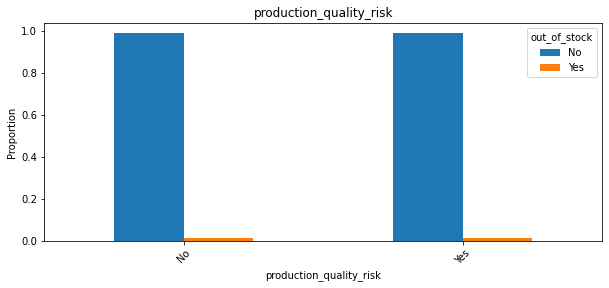

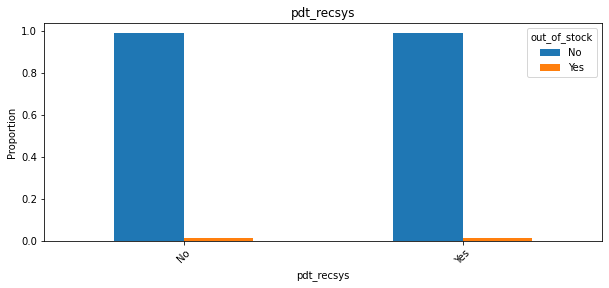

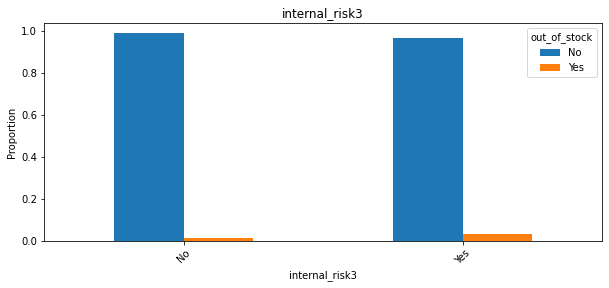

In [110]:
cat_cols= list(df.select_dtypes(include=['object']).columns[:-1])
for i in cat_cols:
    other= round(pd.crosstab(df[df[i].notnull()][i], df['out_of_stock']).\
                 div(pd.crosstab(df[df[i].notnull()][i],df['out_of_stock']).apply(sum,1),0),2)
    ax = other.plot(kind ='bar', title = i, figsize = (10,4))
    ax.set_xlabel(i)
    ax.set_ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.show()

In [111]:
from IPython.display import display
for i in cat_cols:
  print('Table for',str(i),'vs out_of_stock')
  display(pd.crosstab(df[i], df['out_of_stock'], margins=True, normalize='index'))
  print("\n")

Table for identified_defect vs out_of_stock


out_of_stock,No,Yes
identified_defect,,
No,0.992727,0.007273
Yes,0.905263,0.094737
All,0.992684,0.007316




Table for internal_risk1 vs out_of_stock


out_of_stock,No,Yes
internal_risk1,,
No,0.992105,0.007895
Yes,0.994655,0.005345
All,0.992684,0.007316




Table for internal_risk2 vs out_of_stock


out_of_stock,No,Yes
internal_risk2,,
No,0.992693,0.007307
Yes,0.947368,0.052632
All,0.992684,0.007316




Table for production_quality_risk vs out_of_stock


out_of_stock,No,Yes
production_quality_risk,,
No,0.992935,0.007065
Yes,0.990836,0.009164
All,0.992684,0.007316




Table for pdt_recsys vs out_of_stock


out_of_stock,No,Yes
pdt_recsys,,
No,0.990912,0.009088
Yes,0.992751,0.007249
All,0.992684,0.007316




Table for internal_risk3 vs out_of_stock


out_of_stock,No,Yes
internal_risk3,,
No,0.992691,0.007309
Yes,0.971831,0.028169
All,0.992684,0.007316


In [114]:
df.select_dtypes(include=['float']).columns

Index(['present_inv', 'lead_time', 'total_whpk_qty', 'fcst_3_mo', 'fcst_6_mo',
       'fcst_9_mo', 'sls_1_mo', 'sls_3_mo', 'sls_6_mo', 'sls_9_mo',
       'minimum_stock_qty', 'spare_parts_overdue', 'avg_ratings_6_mo',
       'avg_ratings_12_mo', 'stock_overdue'],
      dtype='object')

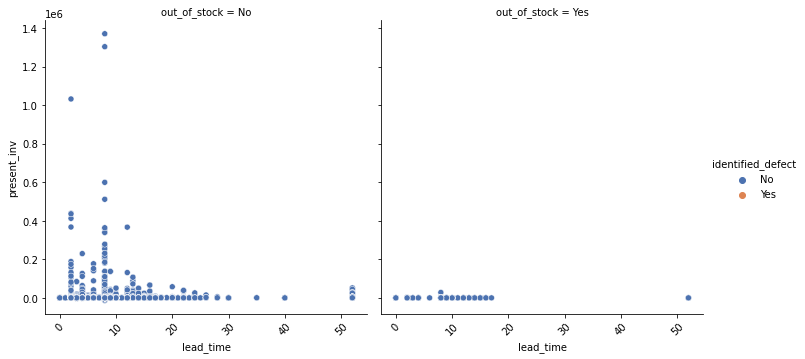

<Figure size 720x432 with 0 Axes>

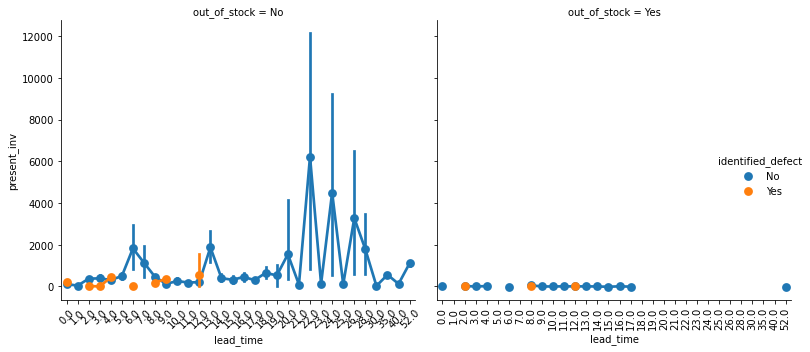

In [122]:
plot=sns.relplot(data=df, x='lead_time', y='present_inv', col='out_of_stock', hue='identified_defect', palette="deep", kind="scatter")
plt.figure(figsize=(10,6))
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()

plot=sns.factorplot(x ='lead_time', y ='present_inv',
               hue='identified_defect',col = 'out_of_stock', data = df)
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

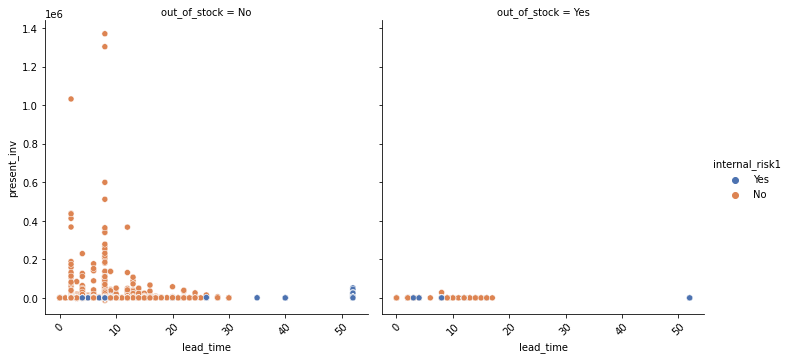

<Figure size 720x432 with 0 Axes>

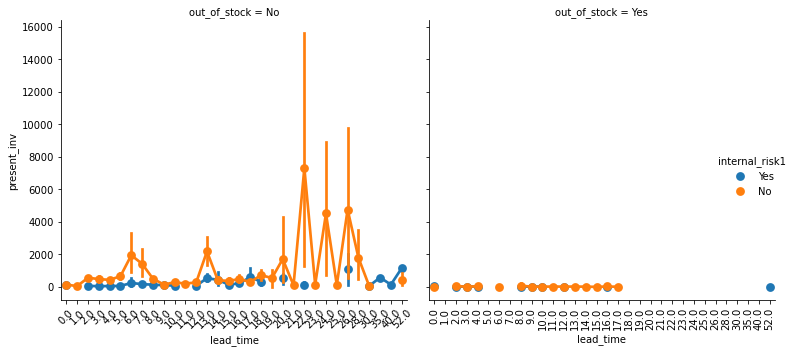

In [123]:
plot=sns.relplot(data=df, x='lead_time', y='present_inv', col='out_of_stock', hue='internal_risk1', palette="deep", kind="scatter")
plt.figure(figsize=(10,6))
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()

plot=sns.factorplot(x ='lead_time', y ='present_inv',
               hue='internal_risk1',col = 'out_of_stock', data = df)
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

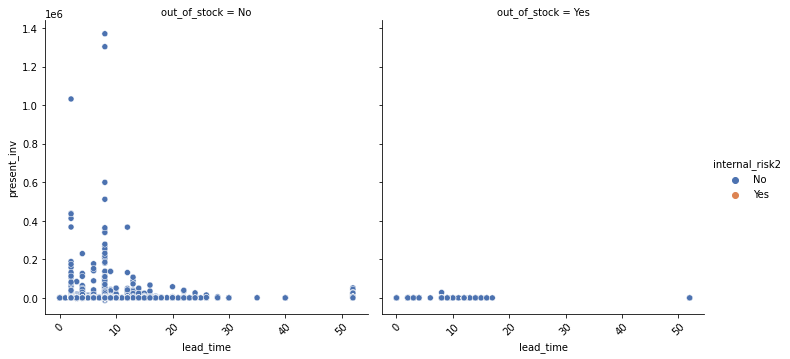

<Figure size 720x432 with 0 Axes>

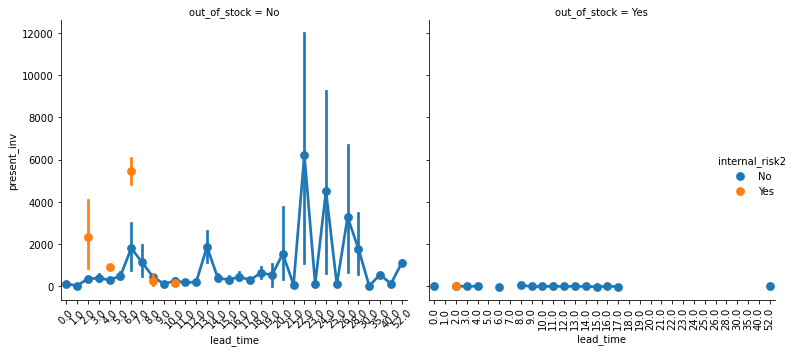

In [124]:
plot=sns.relplot(data=df, x='lead_time', y='present_inv', col='out_of_stock', hue='internal_risk2', palette="deep", kind="scatter")
plt.figure(figsize=(10,6))
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()

plot=sns.factorplot(x ='lead_time', y ='present_inv',
               hue='internal_risk2',col = 'out_of_stock', data = df)
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

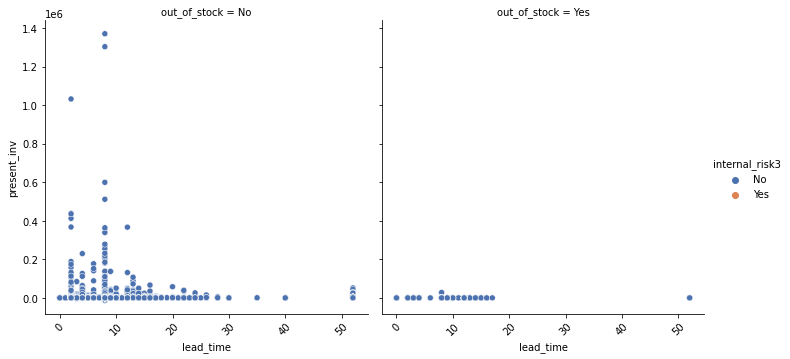

<Figure size 720x432 with 0 Axes>

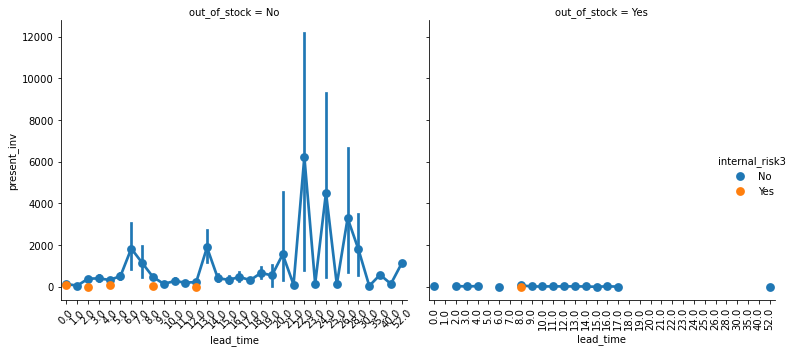

In [125]:
plot=sns.relplot(data=df, x='lead_time', y='present_inv', col='out_of_stock', hue='internal_risk3', palette="deep", kind="scatter")
plt.figure(figsize=(10,6))
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()

plot=sns.factorplot(x ='lead_time', y ='present_inv',
               hue='internal_risk3',col = 'out_of_stock', data = df)
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

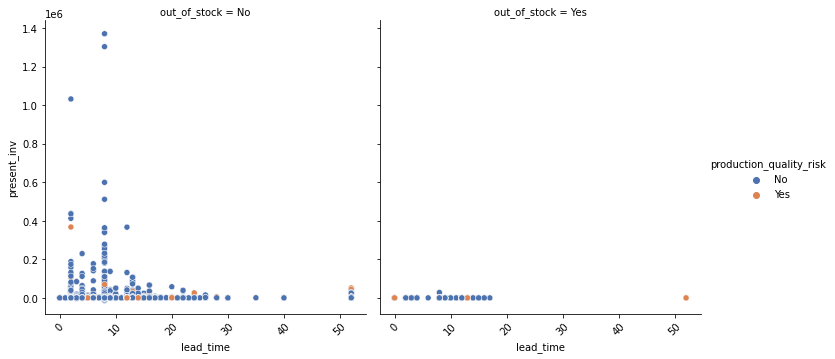

<Figure size 720x432 with 0 Axes>

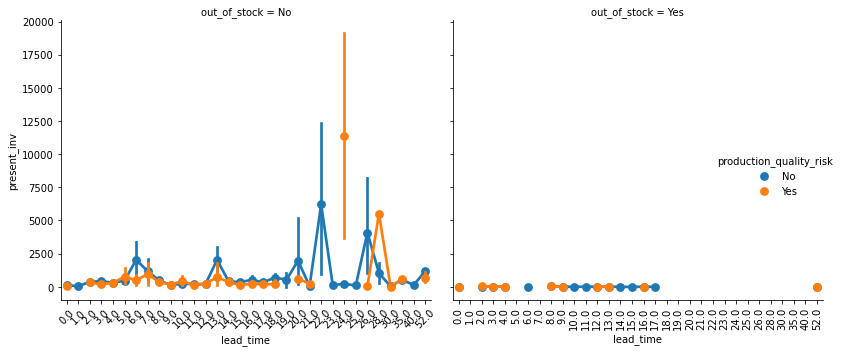

In [126]:
plot=sns.relplot(data=df, x='lead_time', y='present_inv', col='out_of_stock', hue='production_quality_risk', palette="deep", kind="scatter")
plt.figure(figsize=(10,6))
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()

plot=sns.factorplot(x ='lead_time', y ='present_inv',
               hue='production_quality_risk',col = 'out_of_stock', data = df)
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

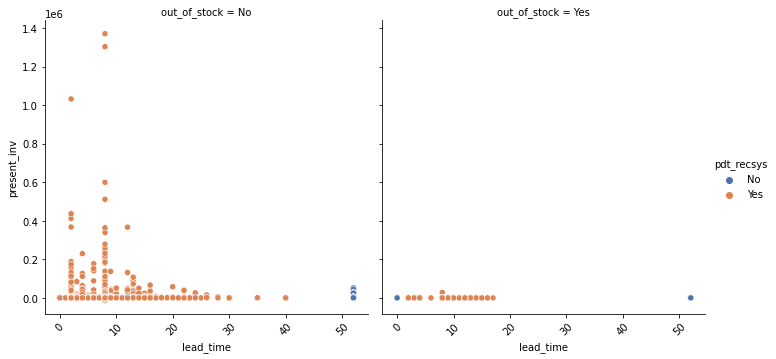

<Figure size 720x432 with 0 Axes>

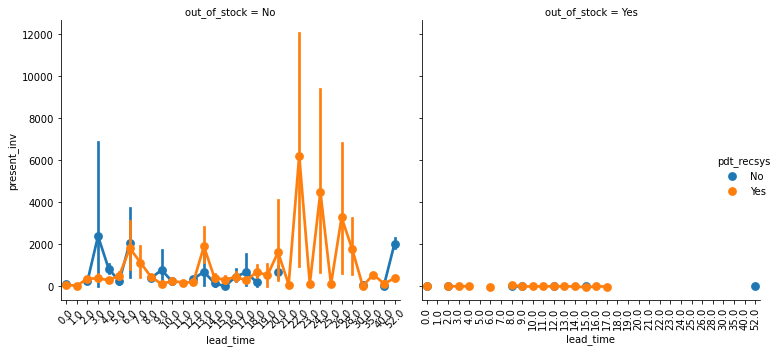

In [127]:
plot=sns.relplot(data=df, x='lead_time', y='present_inv', col='out_of_stock', hue='pdt_recsys', palette="deep", kind="scatter")
plt.figure(figsize=(10,6))
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()

plot=sns.factorplot(x ='lead_time', y ='present_inv',
               hue='pdt_recsys',col = 'out_of_stock', data = df)
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

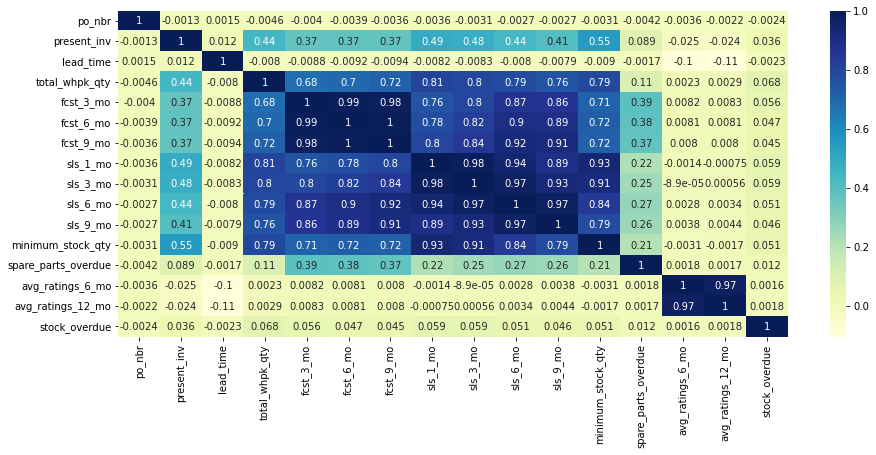

In [48]:
plt.figure(figsize=(15,6))

sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)
plt.show()

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
po_nbr,192994.0,2.256478e+06,764456.576351,1045867.0,1594203.25,2072349.00,3041604.25,3526980.0
present_inv,192994.0,4.071565e+02,7308.631312,-13491.0,4.00,15.00,80.00,1370327.0
lead_time,181317.0,7.857542e+00,6.995806,0.0,4.00,8.00,9.00,52.0
total_whpk_qty,192994.0,4.989741e+01,1669.073170,0.0,0.00,0.00,0.00,328060.0
fcst_3_mo,192994.0,1.916102e+02,5743.923043,0.0,0.00,0.00,4.00,1218328.0
fcst_6_mo,192994.0,3.689133e+02,11370.624038,0.0,0.00,0.00,12.00,2461360.0
fcst_9_mo,192994.0,5.411289e+02,16942.490139,0.0,0.00,0.00,20.00,3777304.0
sls_1_mo,192994.0,6.036901e+01,2115.744453,0.0,0.00,0.00,4.00,366191.0
sls_3_mo,192994.0,1.896981e+02,6265.479413,0.0,0.00,1.00,15.00,1084974.0
sls_6_mo,192994.0,3.686664e+02,11631.795911,0.0,0.00,2.00,31.00,2146625.0


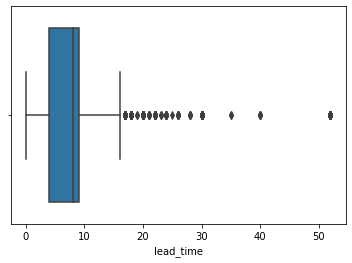

In [50]:
ax = sns.boxplot(x=df["lead_time"])
plt.show()

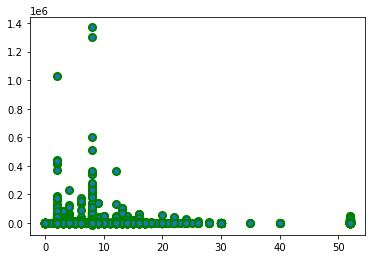

In [51]:
plt.scatter(df['lead_time'], df['present_inv'],

linewidths = 2,
marker ="o",
edgecolor ="green",
s = 50)
plt.show()

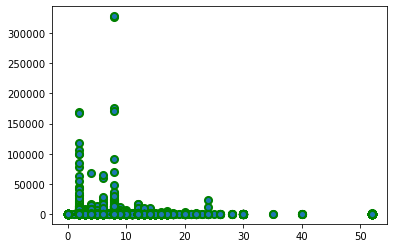

In [52]:
plt.scatter(df['lead_time'], df['total_whpk_qty'],

linewidths = 2,
marker ="o",
edgecolor ="green",
s = 50)
plt.show()

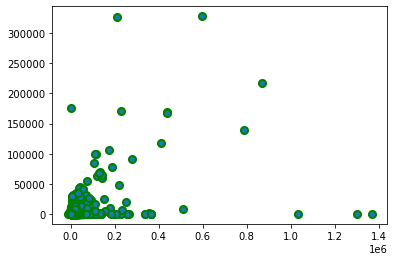

In [53]:
plt.scatter(df['present_inv'], df['total_whpk_qty'],

linewidths = 2,
marker ="o",
edgecolor ="green",
s = 50)
plt.show()

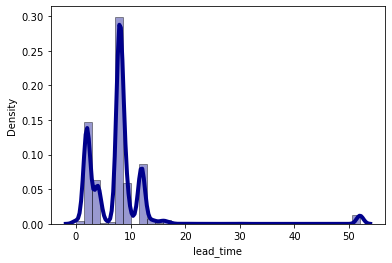

In [54]:
sns.distplot(df['lead_time'], hist=True, kde=True,

bins=int(36), color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

#### Hypothesis: Higher 'present inventory' leads to more OOS scenario

Null Hypothesis: Ho: Mean 'present inventory' qty is same for OOS and Not OOS scenarios

Alt: Ha: Mean 'present inventory' qty for OOS is greater than Not OOS scenarios/

t-test -mean, std finite pop -- CLT 
normal disb of sample
independent obs in samples
equal variance

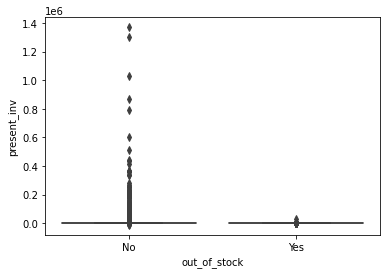

In [56]:
sns.boxplot(data=df,x='out_of_stock',y='present_inv')
plt.show()

In [57]:
df['out_of_stock'].value_counts()

No     191582
Yes      1412
Name: out_of_stock, dtype: int64

In [58]:
#Taking random samples to obtain data for both the groups
noos=df[df['out_of_stock']=='No'].sample(1412,replace=False)
oos=df[df['out_of_stock']=='Yes'].sample(1412,replace=False)
print(noos.shape,oos.shape)

(1412, 23) (1412, 23)


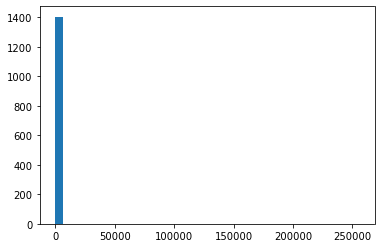

In [59]:
plt.hist(noos['present_inv'],bins=40)

plt.show()

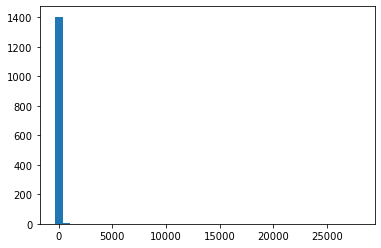

In [60]:
plt.hist(oos['present_inv'],bins=40)

plt.show()

In [61]:
print(np.var(oos['present_inv']))
print(np.var(noos['present_inv']))

564835.063941509
49556496.50880955


In [62]:
print(np.std(oos['present_inv']))
print(np.std(noos['present_inv']))

751.5550970763946
7039.637526805592


In [63]:
t_test, p_value = stats.ttest_ind(oos['present_inv'],noos['present_inv'],alternative='greater', equal_var = False)
t_test, p_value

(-2.319269236849023, 0.9897402663625811)

#Test for Normality - QQ plot
Kolmogorov Smirnoff test, Anderson Darling Test

In [66]:
#Test for equal variance 

In [67]:
oos = oos[oos['present_inv']>0]

In [68]:
noos = noos[noos['present_inv']>0]

In [69]:
noos['present_inv'].min()

1.0

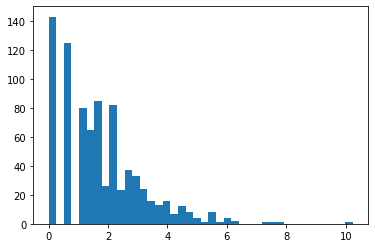

In [70]:
plt.hist(np.log(oos['present_inv']),bins=40)

plt.show()

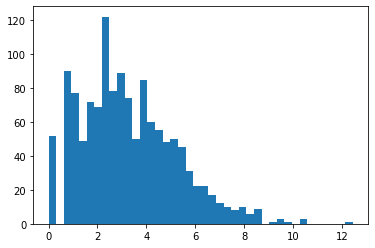

In [71]:
plt.hist(np.log(noos['present_inv']),bins=40)

plt.show()

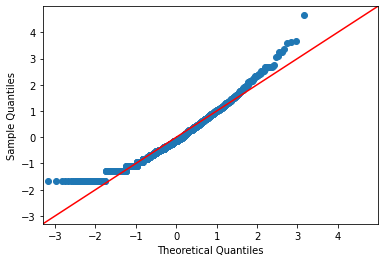

In [78]:
sm.qqplot(np.log(noos['present_inv']),line = '45',fit=True)
plt.show()

In [79]:
#Shapiro Wilk- 

In [ ]:
Risk1 Vs OOS
Yes/No Vs Y/N --chisquare contingency 

In [139]:
contigency= pd.crosstab(df.out_of_stock, df.pdt_recsys)
contigency

pdt_recsys,No,Yes
out_of_stock,,
No,6978,184604
Yes,64,1348


<AxesSubplot:xlabel='out_of_stock'>

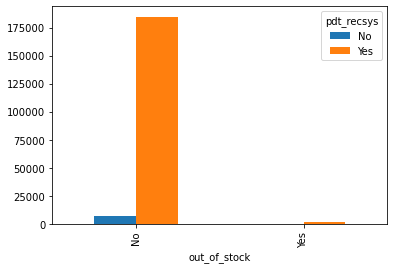

In [132]:
contigency.plot(kind='bar')

In [138]:
chi2, pval, dof, exp_freq = chi2_contingency(contigency, correction=False)
print(' Chi-square Statistic: {} \n P-value: {} \n Degree of Freedom: {} \n Expected'.format(chi2, pval, dof, exp_freq))

 Chi-square Statistic: 3.1599705329523595 
 P-value: 0.07546454544599819 
 Degree of Freedom: 1 
 Expected


identified_defect      No  Yes
out_of_stock                  
No                 191496   86
Yes                  1403    9




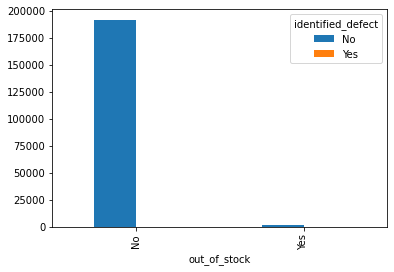

**************************************************
 Chi-square Statistic: 100.01444872558268 
 P-value: 1.5128933527310437e-23 
 Degree of Freedom: 1 
 Expected


In [149]:
contigency= pd.crosstab(df.out_of_stock, df.identified_defect)
print(contigency)
print('\n')

contigency.plot(kind='bar')
plt.show()

print('*'*50)

chi2, pval, dof, exp_freq = chi2_contingency(contigency, correction=False)
print(' Chi-square Statistic: {} \n P-value: {} \n Degree of Freedom: {} \n Expected'.format(chi2, pval, dof, exp_freq))

In [ ]:
contigency= pd.crosstab(df.out_of_stock, df.identified_defect)
print(contigency)
print('\n')

contigency.plot(kind='bar')
plt.show()

print('*'*50)

chi2, pval, dof, exp_freq = chi2_contingency(contigency, correction=False)
print(' Chi-square Statistic: {} \n P-value: {} \n Degree of Freedom: {} \n Expected'.format(chi2, pval, dof, exp_freq))

Out of Stock Vs identified_defect
 
identified_defect      No  Yes
out_of_stock                  
No                 191496   86
Yes                  1403    9


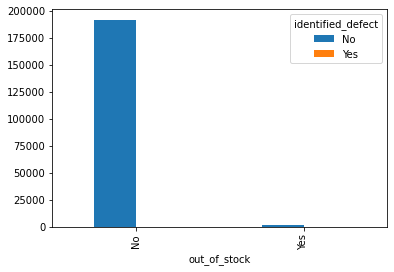

**************************************************
 Chi-square Statistic: 100.01444872558268 
 P-value: 1.5128933527310437e-23 
 Degree of Freedom: 1 
 Expected
Out of stock and identified_defect are dependent
----------------------------------------------------------------------------------------------------
Out of Stock Vs internal_risk1
 
internal_risk1      No    Yes
out_of_stock                 
No              148038  43544
Yes               1178    234


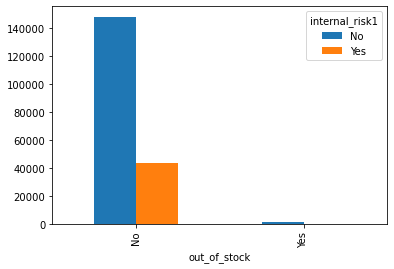

**************************************************
 Chi-square Statistic: 30.29124255849934 
 P-value: 3.7180079756681115e-08 
 Degree of Freedom: 1 
 Expected
Out of stock and internal_risk1 are dependent
----------------------------------------------------------------------------------------------------
Out of Stock Vs internal_risk2
 
internal_risk2      No  Yes
out_of_stock               
No              191546   36
Yes               1410    2


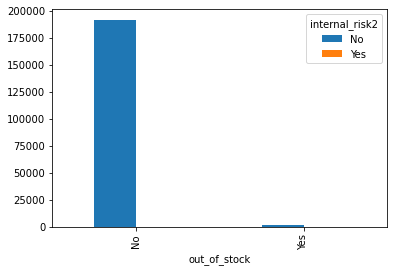

**************************************************
 Chi-square Statistic: 10.746247684092545 
 P-value: 0.001044909688445107 
 Degree of Freedom: 1 
 Expected
Out of stock and internal_risk2 are dependent
----------------------------------------------------------------------------------------------------
Out of Stock Vs production_quality_risk
 
production_quality_risk      No    Yes
out_of_stock                          
No                       168660  22922
Yes                        1200    212


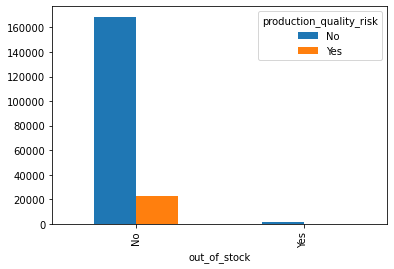

**************************************************
 Chi-square Statistic: 12.355772877019435 
 P-value: 0.00043962495535647124 
 Degree of Freedom: 1 
 Expected
Out of stock and production_quality_risk are dependent
----------------------------------------------------------------------------------------------------
Out of Stock Vs pdt_recsys
 
pdt_recsys      No     Yes
out_of_stock              
No            6978  184604
Yes             64    1348


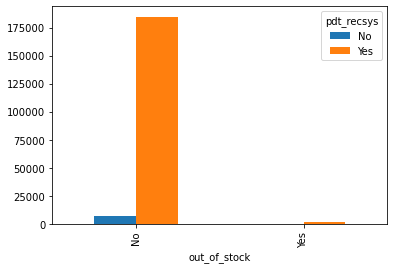

**************************************************
 Chi-square Statistic: 3.1599705329523595 
 P-value: 0.07546454544599819 
 Degree of Freedom: 1 
 Expected
Out of stock and pdt_recsys are independent
----------------------------------------------------------------------------------------------------
Out of Stock Vs internal_risk3
 
internal_risk3      No  Yes
out_of_stock               
No              191513   69
Yes               1410    2


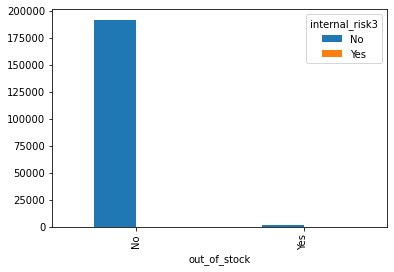

**************************************************
 Chi-square Statistic: 4.252477007500057 
 P-value: 0.03919312533651286 
 Degree of Freedom: 1 
 Expected
Out of stock and internal_risk3 are dependent
----------------------------------------------------------------------------------------------------


In [162]:
for i in cat_cols:
    contigency= pd.crosstab(df.out_of_stock, df[i])
    print("Out of Stock Vs "+i)
    print(' ')
    print(contigency)
    
    contigency.plot(kind='bar')
    plt.show()

    print('*'*50)

    chi2, pval, dof, exp_freq = chi2_contingency(contigency, correction=False)
    print(' Chi-square Statistic: {} \n P-value: {} \n Degree of Freedom: {} \n Expected'.format(chi2, pval, dof, exp_freq))
    if pval < 0.05:
        print("Out of stock and "+i+" are dependent")
    else:
        print("Out of stock and "+i+" are independent")
    
    print('-'*100)


In [175]:
num_cols = df.select_dtypes('float').columns
num_cols

Index(['present_inv', 'lead_time', 'total_whpk_qty', 'fcst_3_mo', 'fcst_6_mo',
       'fcst_9_mo', 'sls_1_mo', 'sls_3_mo', 'sls_6_mo', 'sls_9_mo',
       'minimum_stock_qty', 'spare_parts_overdue', 'avg_ratings_6_mo',
       'avg_ratings_12_mo', 'stock_overdue'],
      dtype='object')

In [176]:
test_stat, p_value = ttest_ind(oos['lead_time'], noos['lead_time'], equal_var=False, alternative='less)
print('The p-value is : ', p_value)

The p-value is :  nan


In [182]:
for i in num_cols:
    test_stat, p_value = ttest_ind(oos[i], noos[i], equal_var=False, alternative='greater')
    print('The p-value to check if '+ i+' is same across out_of_stock category is ', p_value)
    if p_value < 0.05:
        print('Mean '+i+' is different across out_of_stock categories')
    else:
        print('Mean '+i+' is same across out_of_stock categories')
        
    print(' ')
    print('*'*50)
    print(' ')

The p-value to check if present_inv is same across out_of_stock category is  0.9850513412762243
Mean present_inv is same across out_of_stock categories
 
**************************************************
 
The p-value to check if lead_time is same across out_of_stock category is  nan
Mean lead_time is same across out_of_stock categories
 
**************************************************
 
The p-value to check if total_whpk_qty is same across out_of_stock category is  0.9990579508717994
Mean total_whpk_qty is same across out_of_stock categories
 
**************************************************
 
The p-value to check if fcst_3_mo is same across out_of_stock category is  0.3778751948176442
Mean fcst_3_mo is same across out_of_stock categories
 
**************************************************
 
The p-value to check if fcst_6_mo is same across out_of_stock category is  0.4816254946718057
Mean fcst_6_mo is same across out_of_stock categories
 
***************************************

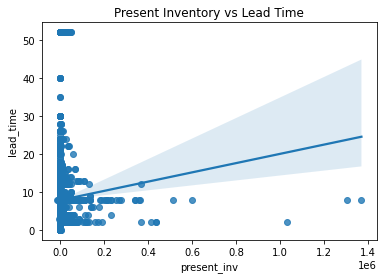

In [184]:
fig = sns.regplot(x="present_inv", y="lead_time", data=df)
plt.title("Present Inventory vs Lead Time")
plt.show()

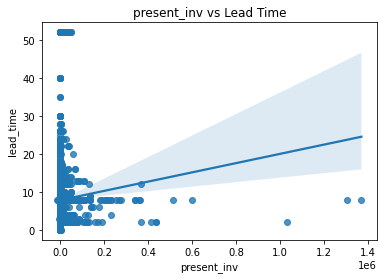

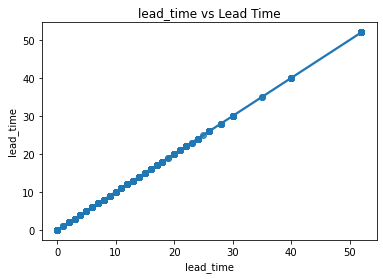

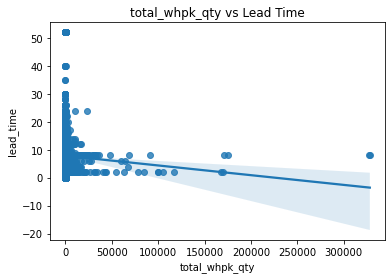

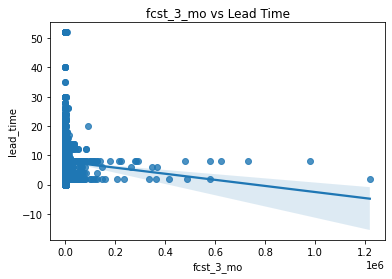

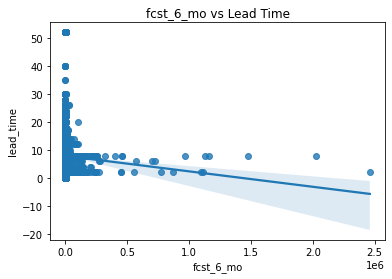

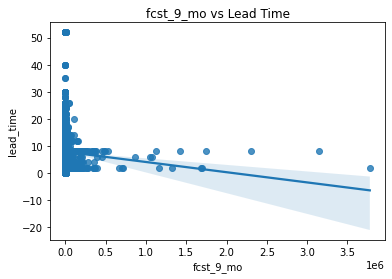

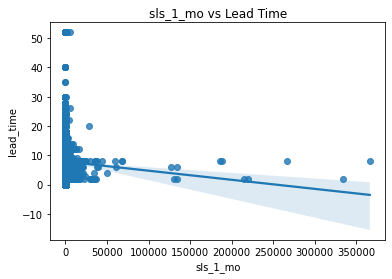

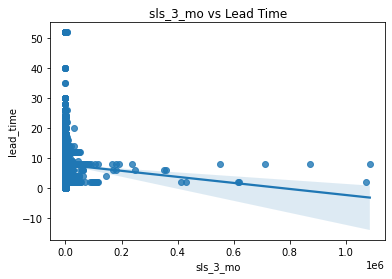

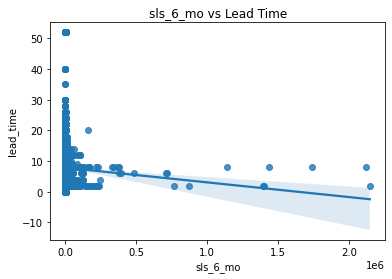

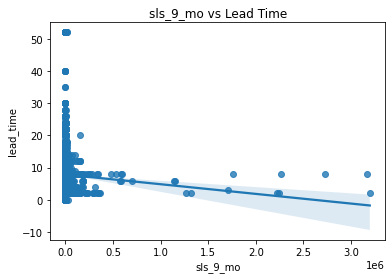

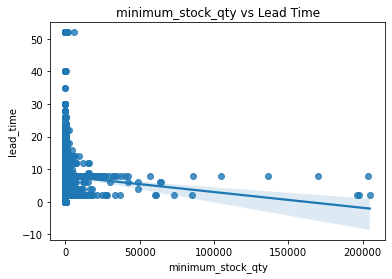

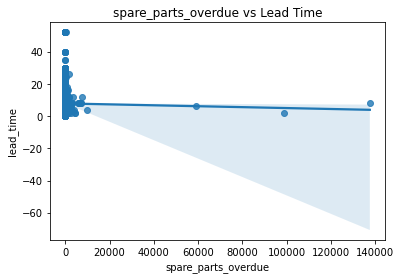

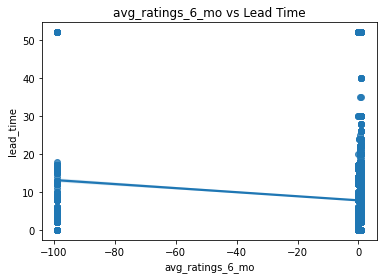

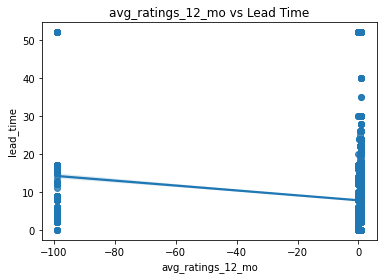

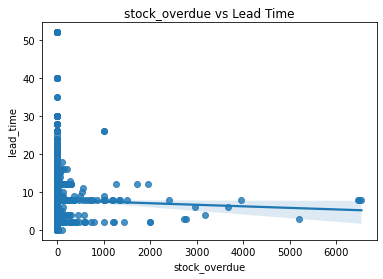

In [185]:
for i in num_cols:
    fig = sns.regplot(x=i, y="lead_time", data=df)
    plt.title(i+ " vs Lead Time")
    plt.show()

In [197]:
for i in cat_cols:
    print(i,':',df[i].unique())

identified_defect : ['No' 'Yes']
internal_risk1 : ['Yes' 'No']
internal_risk2 : ['No' 'Yes']
production_quality_risk : ['No' 'Yes']
pdt_recsys : ['No' 'Yes']
internal_risk3 : ['No' 'Yes']


In [212]:
df.head()

,po_nbr,present_inv,lead_time,total_whpk_qty,fcst_3_mo,fcst_6_mo,fcst_9_mo,sls_1_mo,sls_3_mo,sls_6_mo,...,internal_risk1_No,internal_risk1_Yes,internal_risk2_No,internal_risk2_Yes,production_quality_risk_No,production_quality_risk_Yes,pdt_recsys_No,pdt_recsys_Yes,internal_risk3_No,internal_risk3_Yes
0,2842257,415.0,NaN,0.0,0.0,0.0,0.0,0.0,3.0,28.0,...,0,1,1,0,1,0,1,0,1,0
1,3043795,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,0,1,0,0,1,1,0
2,1950252,71.0,8.0,6.0,100.0,140.0,160.0,14.0,35.0,71.0,...,1,0,1,0,1,0,0,1,1,0
3,1828636,5.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,1,0,0,1,1,0
4,1312565,63.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,...,0,1,1,0,1,0,0,1,1,0


In [218]:
# explains how two category variable can be encoded as a binary variable
dummy = pd.get_dummies(df[cat_cols])
df = pd.concat([df, dummy], axis=1)
df = df.drop(cat_cols, axis=1)
df = df.drop('po_nbr', axis=1)

In [276]:
df.head()

,present_inv,lead_time,total_whpk_qty,fcst_3_mo,fcst_6_mo,fcst_9_mo,sls_1_mo,sls_3_mo,sls_6_mo,sls_9_mo,...,internal_risk2_No,production_quality_risk_No,pdt_recsys_No,internal_risk3_No,identified_defect_No,internal_risk1_No,internal_risk2_No,production_quality_risk_No,pdt_recsys_No,internal_risk3_No
0,415.0,NaN,0.0,0.0,0.0,0.0,0.0,3.0,28.0,33.0,...,1,1,1,1,1,0,1,1,1,1
1,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,1,1,0,1,1,0,1
2,71.0,8.0,6.0,100.0,140.0,160.0,14.0,35.0,71.0,146.0,...,1,1,0,1,1,1,1,1,0,1
3,5.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,1,1,1,1,1,0,1
4,63.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,28.0,...,1,1,0,1,1,0,1,1,0,1


In [221]:
for i in cat_cols:
    df = df.drop(i+"_Yes", axis=1)

In [277]:
df.columns

Index(['present_inv', 'lead_time', 'total_whpk_qty', 'fcst_3_mo', 'fcst_6_mo',
       'fcst_9_mo', 'sls_1_mo', 'sls_3_mo', 'sls_6_mo', 'sls_9_mo',
       'minimum_stock_qty', 'spare_parts_overdue', 'avg_ratings_6_mo',
       'avg_ratings_12_mo', 'stock_overdue', 'out_of_stock',
       'identified_defect_No', 'internal_risk1_No', 'internal_risk2_No',
       'production_quality_risk_No', 'pdt_recsys_No', 'internal_risk3_No',
       'identified_defect_No', 'internal_risk1_No', 'internal_risk2_No',
       'production_quality_risk_No', 'pdt_recsys_No', 'internal_risk3_No'],
      dtype='object')

In [ ]:
predict Lead time - ML model
using OOs as a X feature

In [ ]:
predict OOS prob -- 1,0s

In [278]:
# explains how two category variable can be encoded as a binary variable
dummy = pd.get_dummies(df['out_of_stock'])
df_oos = pd.concat([df, dummy], axis=1)
df_oos = df_oos.drop('out_of_stock', axis=1)

In [279]:
df_oos.rename(columns={"No":"OOS_No","Yes":"OOS_Yes"},inplace=True)
df_oos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192994 entries, 0 to 192993
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   present_inv                 192994 non-null  float64
 1   lead_time                   181317 non-null  float64
 2   total_whpk_qty              192994 non-null  float64
 3   fcst_3_mo                   192994 non-null  float64
 4   fcst_6_mo                   192994 non-null  float64
 5   fcst_9_mo                   192994 non-null  float64
 6   sls_1_mo                    192994 non-null  float64
 7   sls_3_mo                    192994 non-null  float64
 8   sls_6_mo                    192994 non-null  float64
 9   sls_9_mo                    192994 non-null  float64
 10  minimum_stock_qty           192994 non-null  float64
 11  spare_parts_overdue         192994 non-null  float64
 12  avg_ratings_6_mo            192994 non-null  float64
 13  avg_ratings_12

In [280]:
df_oos.dropna(inplace=True)

In [305]:
from sklearn.model_selection import train_test_split

X = df_oos.drop(['lead_time'], axis=1)
y = df_oos['lead_time']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=True)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(145053, 28)
(145053,)
(36264, 28)
(36264,)


In [306]:
#Standardization
from sklearn.preprocessing import StandardScaler
X_train_columns=X_train.columns
std=StandardScaler()
X_train_std=std.fit_transform(X_train)

In [307]:
X_train=pd.DataFrame(X_train_std, columns=X_train_columns)

In [ ]:
f2 = alpha*f1+beta*f3

In [308]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error

models = [
           ['Linear Regression :', LinearRegression()],
         
          ['Lasso Regression :', Lasso(alpha=0.1)], #try with different alpha values
          ['Ridge Regression :', Ridge(alpha=1.0)] #try with different alpha values
          ]

print("Results without removing features with multicollinearity ...")


for name,model in models:
    model.fit(X_train, y_train.values)
    predictions = model.predict(std.transform(X_test))
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Results without removing features with multicollinearity ...
Linear Regression : 6.698720928399464
Lasso Regression : 6.7027229571013764
Ridge Regression : 6.698731975375524


In [309]:
import statsmodels.api as sm
#X_train = sm.add_constant(X_train)
model = sm.OLS(y_train.values, X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.049
Model:                            OLS   Adj. R-squared (uncentered):              0.049
Method:                 Least Squares   F-statistic:                              353.3
Date:                Sun, 01 Oct 2023   Prob (F-statistic):                        0.00
Time:                        12:50:38   Log-Likelihood:                     -5.4337e+05
No. Observations:              145053   AIC:                                  1.087e+06
Df Residuals:                  145032   BIC:                                  1.087e+06
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [ ]:
vif = 1/(1-R2)
IF VIF > 10  remove that feature

In [310]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataset,col):
  dataset=dataset.drop(columns=col,axis=1)
  vif=pd.DataFrame()
  vif['features']=dataset.columns
  vif['VIF_Value']=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
  return vif

In [311]:
calculate_vif(X_train,[])

,features,VIF_Value
0,present_inv,1.235261e+00
1,total_whpk_qty,3.810013e+00
2,fcst_3_mo,1.179958e+02
3,fcst_6_mo,9.809712e+02
4,fcst_9_mo,6.682792e+02
5,sls_1_mo,6.343488e+01
6,sls_3_mo,2.611172e+02
7,sls_6_mo,2.543231e+02
8,sls_9_mo,1.566224e+01
9,minimum_stock_qty,1.072007e+01


In [312]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, cross_validate
tree_clf = DecisionTreeRegressor(random_state=42)

In [374]:
Yact  = 10
Pred = 15
eror = -5
sq_error = 25



Yact  = 50 --- presence of outliers 
Pred = 10
error = 40
sq_error = 1600






50.58508506332861

In [319]:
depths = [1,2,3,5,6,7,9,11]

for depth in depths:
    tree_reg = DecisionTreeRegressor(random_state=7, max_depth = depth, min_samples_split = 10, min_samples_leaf = 20)

    cv_acc_results = cross_validate(tree_reg, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error', return_train_score = True)

    print(f"K-Fold for depth:{depth} -ve MSE Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
    print('***************')

K-Fold for depth:1 -ve MSE Mean: Train: -4428.747905152725 Validation: -4429.510576489018
***************
K-Fold for depth:2 -ve MSE Mean: Train: -3943.9722380773005 Validation: -3944.908487946431
***************
K-Fold for depth:3 -ve MSE Mean: Train: -3588.1583959576474 Validation: -3589.171193497671
***************
K-Fold for depth:5 -ve MSE Mean: Train: -3230.5495004122904 Validation: -3255.118799154708
***************
K-Fold for depth:6 -ve MSE Mean: Train: -3096.0760418151312 Validation: -3130.319793813296
***************
K-Fold for depth:7 -ve MSE Mean: Train: -2987.7339301551892 Validation: -3056.195821853251
***************
K-Fold for depth:9 -ve MSE Mean: Train: -2752.458899711874 Validation: -2933.134058688315
***************
K-Fold for depth:11 -ve MSE Mean: Train: -2558.8508308641913 Validation: -2863.36765248097
***************


In [ ]:
1) VIF independently one by one
2) Handle outliers - IQR, np.clip,isolation forest, z score> 3,disbs, robust_scaler
3) Get more data samples
4) Add Polynomial Features, add rolling based, lag based features
5) Try more hyperparameters

In [313]:
depths = [3,4,5,6,7,9,11,13,15]
kfold = KFold(n_splits=10)

for depth in depths:
    tree_clf = DecisionTreeRegressor(random_state=7, max_depth = depth)

    cv_acc_results = cross_validate(tree_clf, X_train, y_train, cv = kfold, return_train_score = True)

    print(f"K-Fold for depth:{depth} Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
    print(f"K-Fold for depth: {depth} Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")
    print('***************')

K-Fold for depth:3 Accuracy Mean: Train: 26.28741731423704 Validation: 26.2448432127612
K-Fold for depth: 3 Accuracy Std: Train: 0.2617926245116066 Validation: 2.325653115916946
***************
K-Fold for depth:4 Accuracy Mean: Train: 30.478195704508444 Validation: 30.00720481374114
K-Fold for depth: 4 Accuracy Std: Train: 0.2354892990904588 Validation: 2.15191464383758
***************
K-Fold for depth:5 Accuracy Mean: Train: 33.663248757051676 Validation: 32.99591131495471
K-Fold for depth: 5 Accuracy Std: Train: 0.3015304206748463 Validation: 2.2457893588907942
***************
K-Fold for depth:67 Accuracy Mean: Train: 97.68260331587071 Validation: 18.5516500960449
K-Fold for depth: 67 Accuracy Std: Train: 0.0603268225418651 Validation: 3.73985265690708
***************
K-Fold for depth:9 Accuracy Mean: Train: 45.37101264986133 Validation: 39.18150197031976
K-Fold for depth: 9 Accuracy Std: Train: 0.3874897205232571 Validation: 2.720337668493903
***************
K-Fold for depth:11 Accu

In [314]:
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn import tree
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth" : [3, 5, 7],
    "max_leaf_nodes" : [15, 20, 25]
}

model1 = DTR()
clf = GridSearchCV(model1, params, cv=5)

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7],
                         'max_leaf_nodes': [15, 20, 25]})

In [315]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

Parameters:{'max_depth': 3, 'max_leaf_nodes': 15} Mean_score: 0.2623672349187237 Rank: 7
Parameters:{'max_depth': 3, 'max_leaf_nodes': 20} Mean_score: 0.2623672349187237 Rank: 7
Parameters:{'max_depth': 3, 'max_leaf_nodes': 25} Mean_score: 0.2623672349187237 Rank: 7
Parameters:{'max_depth': 5, 'max_leaf_nodes': 15} Mean_score: 0.32338489318009456 Rank: 6
Parameters:{'max_depth': 5, 'max_leaf_nodes': 20} Mean_score: 0.3271159514627358 Rank: 5
Parameters:{'max_depth': 5, 'max_leaf_nodes': 25} Mean_score: 0.32845061986975194 Rank: 4
Parameters:{'max_depth': 7, 'max_leaf_nodes': 15} Mean_score: 0.3316978316615871 Rank: 3
Parameters:{'max_depth': 7, 'max_leaf_nodes': 20} Mean_score: 0.34419528265349386 Rank: 2
Parameters:{'max_depth': 7, 'max_leaf_nodes': 25} Mean_score: 0.3529454536764839 Rank: 1


In [316]:
print(clf.best_estimator_)

DecisionTreeRegressor(max_depth=7, max_leaf_nodes=25)


In [317]:
# Learning Curves
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, Y, title):

  train_sizes, train_scores, test_scores, _, _ = learning_curve(estimator,
                                                                        X,
                                                                        Y,
                                                                        return_times=True
                                                                        )

  fig, axes = plt.subplots(1, 1, figsize = (10, 5))

  axes.set_title(title)
  axes.plot
  axes.set_xlabel("Training examples")
  axes.set_ylabel("Score")


  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

  # Plot learning curve
  axes.grid()
  axes.fill_between(
      train_sizes,
      train_scores_mean - train_scores_std,
      train_scores_mean + train_scores_std,
      alpha=0.1,
      color="r",
  )
  axes.fill_between(
      train_sizes,
      test_scores_mean - test_scores_std,
      test_scores_mean + test_scores_std,
      alpha=0.1,
      color="g",
  )
  axes.plot(
      train_sizes, train_scores_mean, "o-", color="r", label="Training score"
  )
  axes.plot(
      train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
  )
  axes.legend(loc="best")

  plt.show()

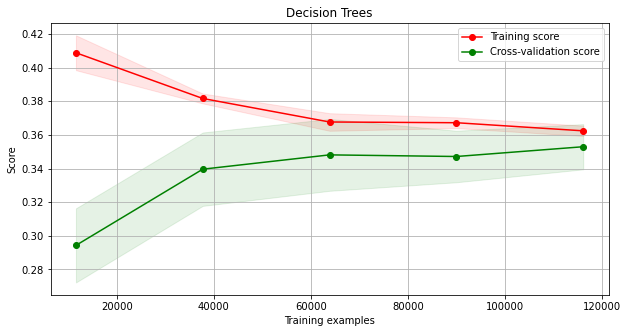

-0.01194405791343045


In [318]:
model1 = clf.best_estimator_

model1.fit(X_train, y_train)

plot_learning_curve(model1, X_train, y_train, "Decision Trees")

print(model1.score(X_test, y_test))

# more data could help as CV-score is improving as datset size increases.

In [375]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV
import datetime as dt

params = {
    "n_estimators": [10,25,50,100,150,200],
    "max_depth" : [3, 5, 7],
    "max_leaf_nodes" : [15, 20, 25]
}

rfc = RFC(n_jobs = -1)
clf = RandomizedSearchCV(rfc, params, scoring = "accuracy", cv=3, n_jobs = -1, verbose = 1)

start = dt.datetime.now()
clf.fit(X_train, Y_train)
end = dt.datetime.now()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.2min finished


In [376]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

Parameters:{'n_estimators': 50, 'max_leaf_nodes': 20, 'max_depth': 3} Mean_score: 0.9924923993299001 Rank: 1
Parameters:{'n_estimators': 150, 'max_leaf_nodes': 25, 'max_depth': 3} Mean_score: 0.9924923993299001 Rank: 1
Parameters:{'n_estimators': 25, 'max_leaf_nodes': 25, 'max_depth': 7} Mean_score: 0.9924923993299001 Rank: 1
Parameters:{'n_estimators': 25, 'max_leaf_nodes': 25, 'max_depth': 5} Mean_score: 0.9924923993299001 Rank: 1
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 20, 'max_depth': 7} Mean_score: 0.9924923993299001 Rank: 1
Parameters:{'n_estimators': 100, 'max_leaf_nodes': 25, 'max_depth': 3} Mean_score: 0.9924923993299001 Rank: 1
Parameters:{'n_estimators': 10, 'max_leaf_nodes': 25, 'max_depth': 5} Mean_score: 0.9924923993299001 Rank: 1
Parameters:{'n_estimators': 150, 'max_leaf_nodes': 25, 'max_depth': 5} Mean_score: 0.9924923993299001 Rank: 1
Parameters:{'n_estimators': 200, 'max_leaf_nodes': 25, 'max_depth': 7} Mean_score: 0.9924923993299001 Rank: 1
Parameters:{'n_

In [377]:
rf = clf.best_estimator_

rf.fit(X_train, Y_train)

print("Model acc",rf.score(X_test, Y_test))

# more data could help as CV-score is improving as datset size increases.

Model acc 0.9924167218177807


In [ ]:
#Regression - As much feature enigineering




In [ ]:
ML for predicting lead time 

In [ ]:
ML for predicting OOS probability

In [355]:
df.head()

,present_inv,lead_time,total_whpk_qty,fcst_3_mo,fcst_6_mo,fcst_9_mo,sls_1_mo,sls_3_mo,sls_6_mo,sls_9_mo,...,internal_risk2_No,production_quality_risk_No,pdt_recsys_No,internal_risk3_No,identified_defect_No,internal_risk1_No,internal_risk2_No,production_quality_risk_No,pdt_recsys_No,internal_risk3_No
1,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,1,1,0,1,1,0,1
2,71.0,8.0,6.0,100.0,140.0,160.0,14.0,35.0,71.0,146.0,...,1,1,0,1,1,1,1,1,0,1
3,5.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,1,1,1,1,1,0,1
4,63.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,28.0,...,1,1,0,1,1,0,1,1,0,1
5,3149.0,16.0,152.0,0.0,720.0,720.0,1528.0,1822.0,2443.0,3261.0,...,1,1,0,1,1,1,1,1,0,1


In [356]:
df.dropna(inplace=True)
df["out_of_stock"] = df["out_of_stock"].replace({"Yes":1,"No":0})
df["out_of_stock"] 

In [371]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ["out_of_stock"])
Y = df["out_of_stock"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True)

print(f"Sizes of the sets created are:\nTraining set:{X_train.shape}\nTest set:{X_test.shape}")
print(f"Sizes of the sets created are:\nTraining set:{Y_train.shape}\nTest set:{Y_test.shape}")

Sizes of the sets created are:
Training set:(145053, 27)
Test set:(36264, 27)
Sizes of the sets created are:
Training set:(145053,)
Test set:(36264,)


In [372]:
Y_train

152165    0
98334     0
119585    0
161689    0
87800     0
         ..
88640     0
16451     0
150184    0
160025    0
163760    0
Name: out_of_stock, Length: 145053, dtype: int64

In [378]:
1/9

0.1111111111111111

In [ ]:
0--900
1--100


900/100= w1 = 9: 1 class
    
100/900 = w2 = 0.11 : 0 class
    
0:0.11
1: 9
    


In [ ]:
#1) Try Logistic Regression
#2) Use another metric like F1 score instead of accuracy 
#3) Handle imbalanced data - undersmapling, oversampling, SMOTE, class_weights


FP---> You predict there is OOS but in reality no OOS--> pay extra charges for storing it -- precision
FN---> You predict there is no OOS but in reality there is OOS --> loss of sales -- more hamrful -- recall



recall and precision --> F1 score 

In [340]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn import tree
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth" : [3, 5, 7],
    "max_leaf_nodes" : [15, 20, 25]
}

model1 = DTC()
clf = GridSearchCV(model1, params, scoring = "accuracy", cv=5)

clf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'max_leaf_nodes': [15, 20, 25]},
             scoring='accuracy')

In [341]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

Parameters:{'max_depth': 3, 'max_leaf_nodes': 15} Mean_score: 0.9924579295487902 Rank: 2
Parameters:{'max_depth': 3, 'max_leaf_nodes': 20} Mean_score: 0.9924579295487902 Rank: 2
Parameters:{'max_depth': 3, 'max_leaf_nodes': 25} Mean_score: 0.9924579295487902 Rank: 2
Parameters:{'max_depth': 5, 'max_leaf_nodes': 15} Mean_score: 0.9924234591519572 Rank: 5
Parameters:{'max_depth': 5, 'max_leaf_nodes': 20} Mean_score: 0.9924234591519572 Rank: 5
Parameters:{'max_depth': 5, 'max_leaf_nodes': 25} Mean_score: 0.9924234591519572 Rank: 5
Parameters:{'max_depth': 7, 'max_leaf_nodes': 15} Mean_score: 0.9924717171847153 Rank: 1
Parameters:{'max_depth': 7, 'max_leaf_nodes': 20} Mean_score: 0.9923752004062789 Rank: 8
Parameters:{'max_depth': 7, 'max_leaf_nodes': 25} Mean_score: 0.9922717896910598 Rank: 9


In [342]:
# Learning Curves
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, Y, title):

  train_sizes, train_scores, test_scores, _, _ = learning_curve(estimator,
                                                                        X,
                                                                        Y,
                                                                        return_times=True
                                                                        )

  fig, axes = plt.subplots(1, 1, figsize = (10, 5))

  axes.set_title(title)
  axes.plot
  axes.set_xlabel("Training examples")
  axes.set_ylabel("Score")


  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

  # Plot learning curve
  axes.grid()
  axes.fill_between(
      train_sizes,
      train_scores_mean - train_scores_std,
      train_scores_mean + train_scores_std,
      alpha=0.1,
      color="r",
  )
  axes.fill_between(
      train_sizes,
      test_scores_mean - test_scores_std,
      test_scores_mean + test_scores_std,
      alpha=0.1,
      color="g",
  )
  axes.plot(
      train_sizes, train_scores_mean, "o-", color="r", label="Training score"
  )
  axes.plot(
      train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
  )
  axes.legend(loc="best")

  plt.show()

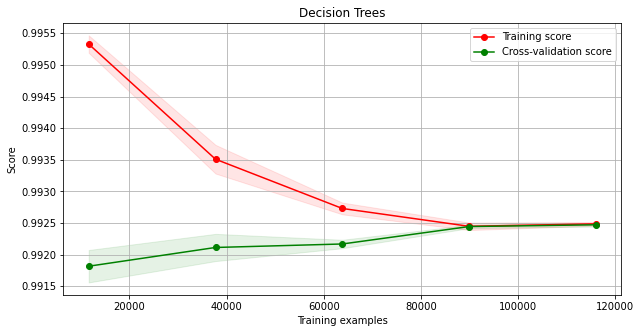

0.9926097507169644


In [343]:
model1 = clf.best_estimator_

model1.fit(X_train, Y_train)

plot_learning_curve(model1, X_train, Y_train, "Decision Trees")

print(model1.score(X_test, Y_test))

# more data could help as CV-score is improving as datset size increases.

In [344]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV
import datetime as dt

params = {
    "n_estimators": [10,25,50,100,150,200],
    "max_depth" : [3, 5, 7],
    "max_leaf_nodes" : [15, 20, 25]
}

rfc = RFC(n_jobs = -1)
clf = RandomizedSearchCV(rfc, params, scoring = "accuracy", cv=3, n_jobs = -1, verbose = 1)

start = dt.datetime.now()
clf.fit(X_train, Y_train)
end = dt.datetime.now()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   55.0s finished


In [345]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")


Parameters:{'n_estimators': 25, 'max_leaf_nodes': 20, 'max_depth': 3} Mean_score: 0.9924648232025536 Rank: 2
Parameters:{'n_estimators': 150, 'max_leaf_nodes': 15, 'max_depth': 3} Mean_score: 0.9924648232025536 Rank: 2
Parameters:{'n_estimators': 10, 'max_leaf_nodes': 15, 'max_depth': 3} Mean_score: 0.9924648232025536 Rank: 2
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 25, 'max_depth': 3} Mean_score: 0.9924648232025536 Rank: 2
Parameters:{'n_estimators': 10, 'max_leaf_nodes': 20, 'max_depth': 7} Mean_score: 0.9924717172343902 Rank: 1
Parameters:{'n_estimators': 200, 'max_leaf_nodes': 20, 'max_depth': 3} Mean_score: 0.9924648232025536 Rank: 2
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 20, 'max_depth': 5} Mean_score: 0.9924648232025536 Rank: 2
Parameters:{'n_estimators': 10, 'max_leaf_nodes': 20, 'max_depth': 3} Mean_score: 0.9924648232025536 Rank: 2
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 25, 'max_depth': 7} Mean_score: 0.9924648232025536 Rank: 2
Parameters:{'n_es

In [347]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_validate

tree_clf = RandomForestClassifier(random_state=7, max_depth=4, n_estimators=100)
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(tree_clf, X_train, Y_train, cv = kfold, scoring = 'accuracy', return_train_score = True)

print(f"K-Fold Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
print(f"K-Fold Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")

K-Fold Accuracy Mean: Train: 99.24648230739595 Validation: 99.24648127867592
K-Fold Accuracy Std: Train: 0.008531355171649862 Validation: 0.07678027177682993


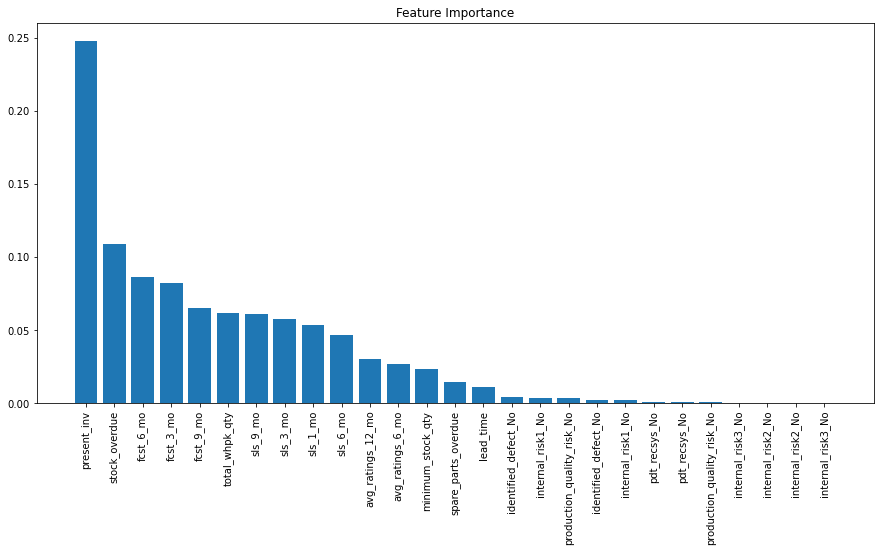

In [351]:
# Feature importance
import numpy as np 
import matplotlib.pyplot as plt

clf = RandomForestClassifier(random_state=7, max_depth=4, n_estimators=100)
clf.fit(X_train, Y_train)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [380]:
# pred of LT --> pdf---> prob1
# pred of OOS ---> prob2

# HRS = prob1*prob2--> final prob

# if final_prob > 0.7 then send alert message